<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/5_Hypothesis_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Confidence Scores - Decision Function

Reading the confidence scores of the predictions made in the previous notebook. These will be used as variables in the construction of hypothesis tests. Also reading the fine-grained dataframe which apart from the above scores it is also comprised of the binary predictions and all the respective movies and movies metadata

The prediction was made on 55,577 unlabelled movies, and thus this is the number of rows of the imminent dataframe

In [4]:
downloaded = drive.CreateFile({'id':'1NwMG7KBGFELz9B3Yb1SPLWy2F_bGKsh8'}) 
downloaded.GetContentFile('predictions_decision_scores_df.csv') 

predictions_decision_scores_df = pd.read_csv('predictions_decision_scores_df.csv') 
print("Shape of the decision function scores dataframe: {}".format(predictions_decision_scores_df.shape))

downloaded = drive.CreateFile({'id':'1zf-M5FDIbBmUM42NPIYu_TeFBnIH4TFC'}) 
downloaded.GetContentFile('model_predictions_df.csv') 
model_predictions_df = pd.read_csv('model_predictions_df.csv') 
print("Shape of model_predictions_df: {}".format(model_predictions_df.shape))

Shape of the decision function scores dataframe: (55577, 6)
Shape of model_predictions_df: (55577, 25)


# Normality Tests/checks  & Test hypothesis


normality test in order to detect if variables participathing in the hypothesis tests follow a normal or not distribution. If not, then non-parametric statistical tests should be used.


`Data types`:

[data types_Pearson's guide](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php)

[data types](https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/#:~:text=Types%20of%20Data%20%26%20Measurement%20Scales,%2C%20ordinal%2C%20interval%20and%20ratio.&text=These%20four%20data%20measurement%20scales,as%20you'll%20see%20below.)

[data types](https://www.formpl.us/blog/nominal-ordinal-data#:~:text=Examples%20of%20nominal%20data%20include,with%20a%20level%20of%20order.)

[data types](http://media.news.health.ufl.edu/misc/bolt/Intro/PHC6050-6052/Preliminaries/005-Transcript_Types_of_Variables.pdf)

[data types](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee)

[data types](https://www.graphpad.com/guides/prism/7/statistics/the_different_kinds_of_variabl.htm)



`Refereces for normality test`: 

>> [Jason Brownlee](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

>> [Joos Korstanje
](https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93?gi=9fc10dd34c71)



> `References for (non-parametric) tests:`


[Jason Brownlee](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)

[spearmna's rho](https://www.socscistatistics.com/tests/spearman/default.aspx#:~:text=Spearman's%20Rho%20is%20a%20non,means%20a%20perfect%20negataive%20correlation.)


[spearman's ranks](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php)

[spearman's rho & p](https://geographyfieldwork.com/SpearmansRankCalculator.html#:~:text=The%20Spearman's%20Rank%20Correlation%20Coefficient,values%2C%20scatter%20graph%20and%20conclusion.)

[spearman's correlation](http://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf)

[assumptions for spearman's rank correlation](https://statistics.laerd.com/spss-tutorials/spearmans-rank-order-correlation-using-spss-statistics.php#:~:text=The%20Spearman%20rank%2Dorder%20correlation,letter%20%CF%81%2C%20pronounced%20rho)

[Shinichi Okada
](https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046)

[statistical methods](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)



`others`

[correlation coefficient](
https://link.springer.com/article/10.1057/jt.2009.5)




> Conducting 3 normality tests for the 6 emotions based on their confidence scores values

In [5]:
predictions_decision_scores_df

,happiness,sadness,anger,disgust,fear,surprise
0,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648
1,-0.751322,0.356300,0.094259,-0.201593,0.834589,-0.185706
2,-0.809684,-0.375330,0.201113,0.133015,0.734583,-0.231307
3,0.178236,-0.811422,-0.593782,-0.790995,-0.082126,0.594234
4,-0.787449,0.392056,-0.279454,-0.264936,0.609438,0.215638
...,...,...,...,...,...,...
55572,-1.035505,0.161177,0.127284,0.444999,0.348522,0.189858
55573,-0.019800,0.486757,-0.820125,0.065106,0.205440,0.589265
55574,-0.469937,-0.307425,-0.688936,-0.321107,-0.512536,0.133298
55575,-0.653419,-0.242200,-0.187860,-0.119622,0.645979,0.746631


## Variables of emotions

### 1) Shapiro Test

 although for sampple N> 5000 p-value may not be accurate

In [6]:
# shapiro test, although for sampple N> 5000 p-value may not be accurate

# detecting if the variable follows a normal distribution

from scipy.stats import shapiro

emotion_scores = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

for emotion_score in emotion_scores:
  data = predictions_decision_scores_df[emotion_score].values

  # normality test

  stat, p = shapiro(data)
  print("*************************************************************************************************************************")
  print("Proceeding '{}':\n".format(emotion_score))
  print("Statistics = %.3f, p = %.3f" %(stat,p))
  
  # interpretation
  alpha= 0.05
  if p > alpha:
    print("Sample of '{}' looks Gaussian (fail to reject H0) --> Parametric statistical methods should be used".format(emotion_score))
  else:
    print("Sample of '{}' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used".format(emotion_score))

*************************************************************************************************************************
Proceeding 'happiness':

Statistics = 0.952, p = 0.000
Sample of 'happiness' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'sadness':

Statistics = 0.999, p = 0.000
Sample of 'sadness' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'anger':

Statistics = 0.998, p = 0.000
Sample of 'anger' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'disgust':

Sta

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 2) D’Agostino’s K-squared test

In [7]:
# D'Agnostino and Pearson's Test
from scipy.stats import normaltest

emotion_scores = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

for emotion_score in emotion_scores:
  data = predictions_decision_scores_df[emotion_score].values

  # normality test
  stat, p = normaltest(data)
  print("*************************************************************************************************************************")
  print("Proceeding '{}':\n".format(emotion_score))
  print("Statistics = %.3f, p = %.3f" %(stat,p))
  
  # interpretation
  alpha= 0.05
  if p > alpha:
    print("Sample of '{}' looks Gaussian (fail to reject H0) --> Parametric statistical methods should be used".format(emotion_score))
  else:
    print("Sample of '{}' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used".format(emotion_score))

*************************************************************************************************************************
Proceeding 'happiness':

Statistics = 6014.354, p = 0.000
Sample of 'happiness' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'sadness':

Statistics = 76.374, p = 0.000
Sample of 'sadness' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'anger':

Statistics = 125.383, p = 0.000
Sample of 'anger' does not look Gaussian (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'disgust'

### 3) Anderson-Darling Test

In [8]:
# Anderson-Darling Test
from scipy.stats import anderson


emotion_scores = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

for emotion_score in emotion_scores:
  data = predictions_decision_scores_df[emotion_score].values

  # normality test
  result = anderson(data)
  print("*************************************************************************************************************************")
  print("Proceeding '{}':\n".format(emotion_score))
  print('Statistic: %.3f' % result.statistic)
  
  # interpretation
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0 --> Parametric statistical methods should be used)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0) --> Non-parametric statistical methods should be used' % (sl, cv))

*************************************************************************************************************************
Proceeding 'happiness':

Statistic: 818.503
15.000: 0.576, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
10.000: 0.656, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
5.000: 0.787, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
2.500: 0.918, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
1.000: 1.092, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
*************************************************************************************************************************
Proceeding 'sadness':

Statistic: 15.946
15.000: 0.576, data does not look normal (reject H0) --> Non-parametric statistical methods should be used
10.000: 0.656, data does not loo

## Ratings

### 1) Shapiro Test

In [9]:
downloaded = drive.CreateFile({'id':'1HuGM7c223wK2k7Qnjdx2x5965pNMPqbY'}) 
downloaded.GetContentFile('ratings_10k.csv') 

ratings_10k = pd.read_csv('ratings_10k.csv') 
ratings_10k.shape

(1489023, 4)

In [10]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
data = ratings_10k.rating.values
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 2) D’Agostino’s K-squared test

In [11]:
from scipy.stats import normaltest

data = ratings_10k.rating.values
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=102945.202, p=0.000
Sample does not look Gaussian (reject H0)


### 3) Anderson-Darling Test

In [12]:
from scipy.stats import anderson
data = ratings_10k.rating.values
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 32820.415
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


# Sample of Hypothesis Tests

The sample or hypothesis test will be the merged result of ratings10k dataframe with the dataframe generated by the model predictions, containing 10,000 users 

In [13]:
downloaded = drive.CreateFile({'id':'1HuGM7c223wK2k7Qnjdx2x5965pNMPqbY'}) 
downloaded.GetContentFile('ratings_10k.csv') 

ratings_10k = pd.read_csv('ratings_10k.csv') 
ratings_10k.shape

(1489023, 4)

##  `'ratings_emotions_test'`

In [14]:
model_predictions_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
0,1,862.0,toy stori,adventur anim children comedi fantasi,led woodi andi toy live happili room andi birt...,positive,0.25,0.048,0.886,0.066,0,battl offenc,person person person person person person org ...,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648


In [15]:
 ratings_10k.userId.nunique()

10000

In [16]:
 ratings_10k.userId.nunique()

10000

In [17]:
ratings_with_emotions= model_predictions_df.merge(ratings_10k, on="movieId")
ratings_with_emotions.shape

(1454347, 28)

In [18]:
ratings_with_emotions.userId.nunique()

10000

In [19]:
# keep only useful columns
ratings_emotions_test = ratings_with_emotions[["userId", "movieId", "rating", "rating_cat",
                                               "happiness", "sadness", "anger", "disgust", "fear", "surprise",
                                              "happiness_scores","sadness_scores", "anger_scores", "disgust_scores","fear_scores", "surprise_scores"
                                              ]]
ratings_emotions_test.shape

(1454347, 16)

In [20]:
ratings_emotions_test.head(5)

,userId,movieId,rating,rating_cat,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
0,2,1,3.5,2,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648
1,3,1,4.0,3,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648
2,4,1,3.0,2,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648
3,5,1,4.0,3,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648
4,8,1,4.0,3,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648


In [21]:
ratings_emotions_test.userId.nunique()

10000

In [22]:
import seaborn as sns
'''

# Seaborn visualization library

df= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]
f=sns.pairplot(df)
plt.show
f.fig.set_size_inches(22,18)
'''

'\n\n# Seaborn visualization library\n\ndf= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]\nf=sns.pairplot(df)\nplt.show\nf.fig.set_size_inches(22,18)\n'

In [23]:
'''
# scatter plots & histograms of emotional scores and ratings

df= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]
f= sns.pairplot(df,kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()
f.fig.set_size_inches(22,18)
'''

'\n# scatter plots & histograms of emotional scores and ratings\n\ndf= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]\nf= sns.pairplot(df,kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))\nplt.show()\nf.fig.set_size_inches(22,18)\n'

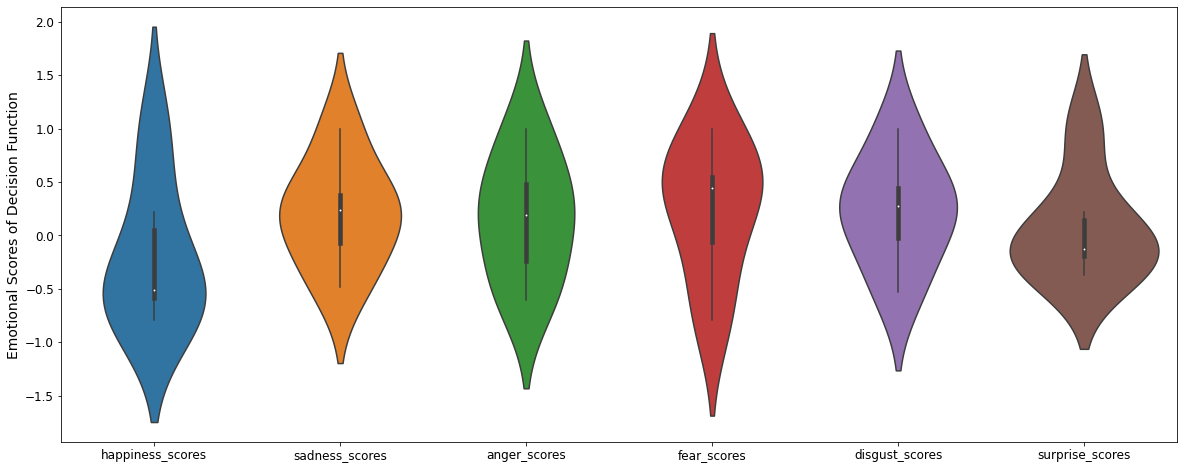

In [24]:
df= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]
corr= df.corr()
plt.figure(figsize=(20,8))
plt.ylabel("Emotional Scores of Decision Function")
sns.violinplot(data=corr)
plt.show()

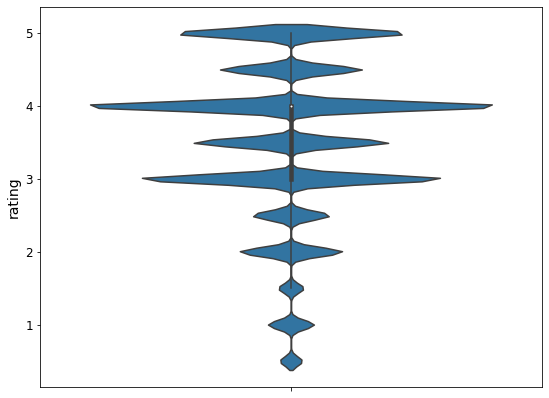

In [25]:
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = ratings_emotions_test["rating"] ) 

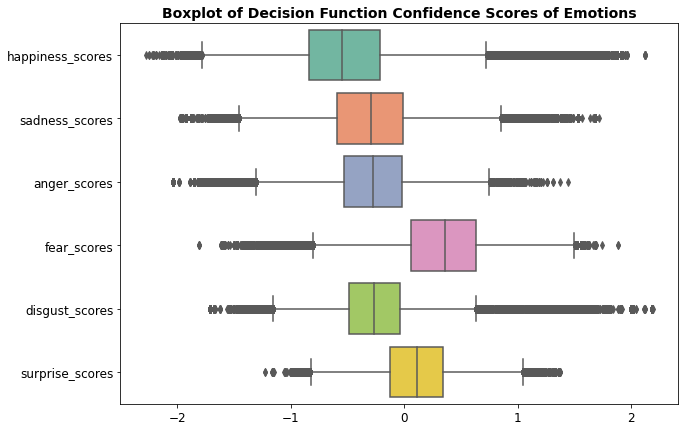

In [26]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

data= ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Boxplot of Decision Function Confidence Scores of Emotions", fontweight="bold", fontsize=14)
plt.show()

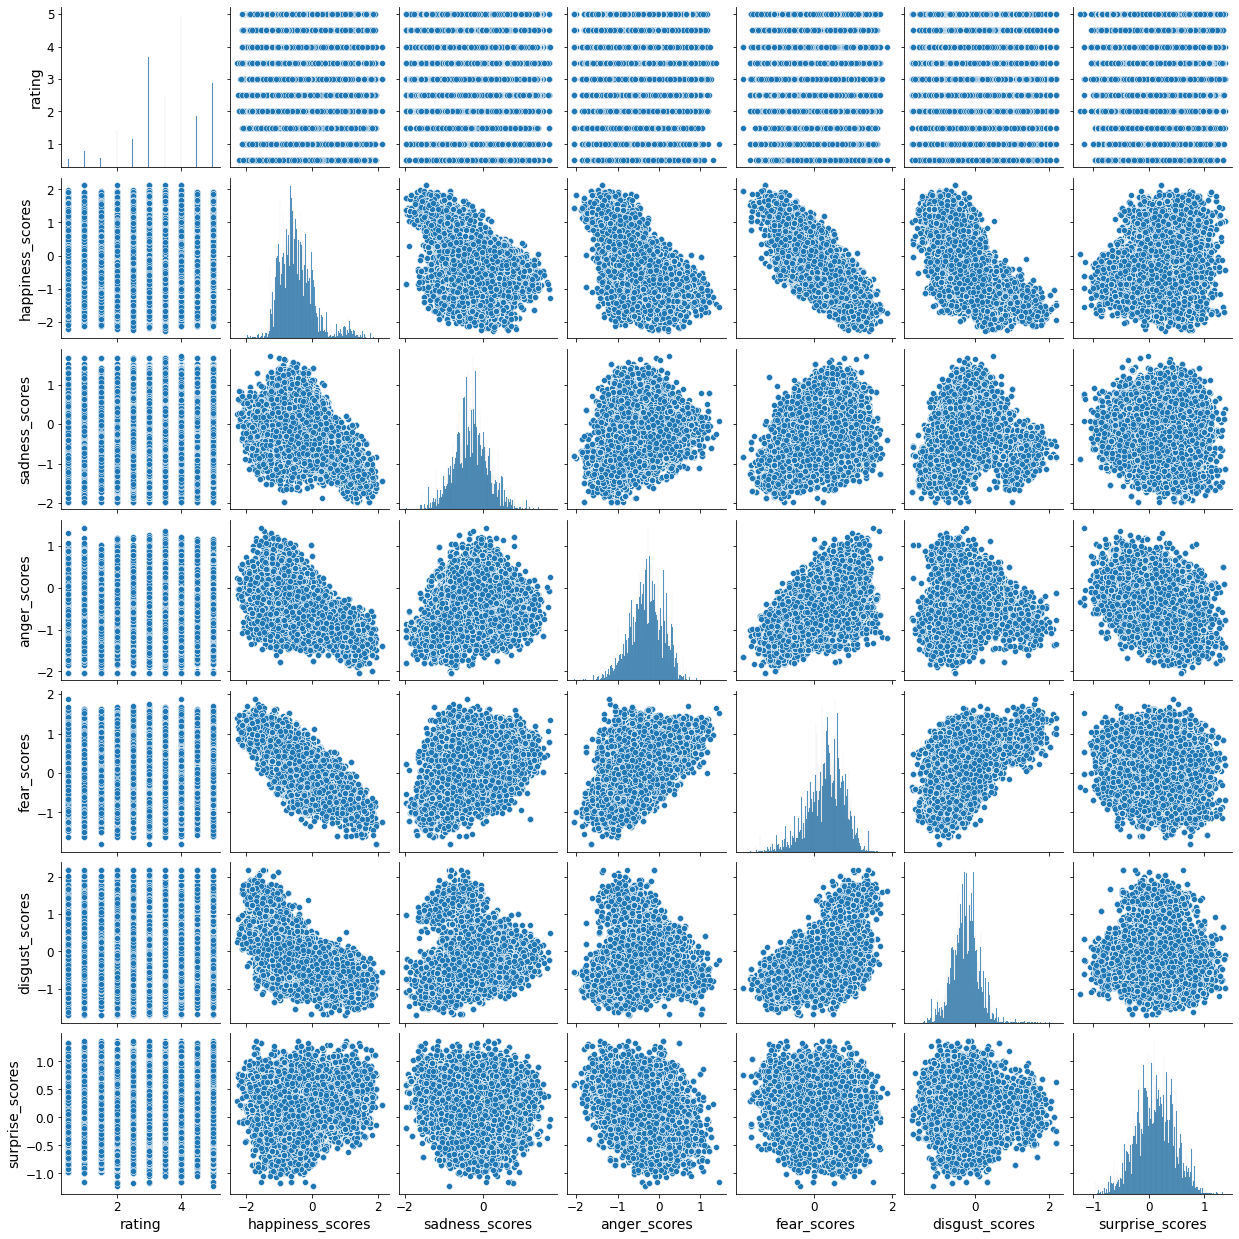

In [27]:
df = ratings_emotions_test[["rating","happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]]
import seaborn as sns
# Basic correlogram
sns.pairplot(df)
#sns.plt.show()
plt.show()

In [28]:
ratings_emotions_test[["happiness_scores", "sadness_scores", "anger_scores", "fear_scores", "disgust_scores", "surprise_scores"]].describe()

,happiness_scores,sadness_scores,anger_scores,fear_scores,disgust_scores,surprise_scores
count,1.454347e+06,1.454347e+06,1.454347e+06,1.454347e+06,1.454347e+06,1.454347e+06
mean,-4.732853e-01,-2.972578e-01,-2.902081e-01,3.216980e-01,-2.638636e-01,1.045398e-01
std,5.431119e-01,4.476277e-01,3.978916e-01,4.519242e-01,3.581665e-01,3.408663e-01
min,-2.278972e+00,-1.974902e+00,-2.039888e+00,-1.806920e+00,-1.714310e+00,-1.229917e+00
25%,-8.442698e-01,-5.902822e-01,-5.343543e-01,5.810081e-02,-4.875079e-01,-1.291199e-01
50%,-5.454908e-01,-2.932115e-01,-2.735673e-01,3.575603e-01,-2.715803e-01,1.093770e-01
75%,-2.170192e-01,-1.338376e-02,-2.019466e-02,6.341570e-01,-4.100996e-02,3.392147e-01
max,2.119704e+00,1.717195e+00,1.442463e+00,1.885589e+00,2.190470e+00,1.367420e+00


# Correlation Matrix in labelled_df

The default correlation matrix is by default using Pearson's correlation, hence this is not right because it should used only if there is normal distibution. Since our data is non distributed, Spearman's correlation function will be used instead


In [29]:
correlation_matrix= ratings_emotions_test.corr()
print("Correlation matrix for happiness: \n\n{}".format(correlation_matrix["happiness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for sadness: \n\n{}".format(correlation_matrix["sadness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for anger: \n\n{}".format(correlation_matrix["anger"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for disgust: \n\n{}".format(correlation_matrix["disgust"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for fear: \n\n{}".format(correlation_matrix["fear"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for surprise: \n\n{}".format(correlation_matrix["surprise"].sort_values(ascending=False)))

Correlation matrix for happiness: 

happiness           1.000000
happiness_scores    0.727207
surprise_scores     0.191582
surprise            0.145321
userId             -0.004265
movieId            -0.009416
rating_cat         -0.041437
rating             -0.044918
disgust            -0.180300
anger              -0.199925
sadness            -0.213824
disgust_scores     -0.370383
sadness_scores     -0.407801
anger_scores       -0.427476
fear               -0.520100
fear_scores        -0.565438
Name: happiness, dtype: float64
Correlation matrix for sadness: 

sadness             1.000000
sadness_scores      0.725760
fear_scores         0.227578
disgust_scores      0.191916
disgust             0.174063
fear                0.160652
movieId             0.039758
rating              0.030701
rating_cat          0.029835
anger_scores        0.026531
anger               0.023275
userId              0.002512
surprise           -0.073984
surprise_scores    -0.079358
happiness          -0.213824

# Hypothesis Tests | Spearman's r correlation coefficient



In [30]:
# Spearman's matrix correlation between ratings and emotions in all dataset
# however this gives only the rho value
# we cannot have an estimate of the p significance value here
correlation_matrix= ratings_emotions_test[["rating", 
                                          "happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"
                                          , ]].corr(method="spearman")
print("Correlation matrix of rating: \n\n{}".format(correlation_matrix["rating"].sort_values(ascending=False)))

Correlation matrix of rating: 

rating              1.000000
sadness_scores      0.045882
fear_scores         0.034070
disgust_scores      0.013027
anger_scores        0.011887
surprise_scores    -0.011273
happiness_scores   -0.024314
Name: rating, dtype: float64


## 1| 1st set of Hypothesis Tests

6 Tests - `All` Dataset, `ratings vs emotions`

6 Hypothesis Tests will be conducted via the Spearman's correlation coefficient rho value, derived from not a user-centric perspective. This means that all movie information will be taken into account, without considering which users have watched which movies and therefore without tracking down user-centric patterns with regard to the 6 emotions.


As a consqeuence, the following tests will identify the degree of relationship between ratings and the 6 emotions accordingly.

In [31]:
ratings_emotions_test.movieId.nunique()

22898

In [32]:
ratings_emotions_test.head(1)

,userId,movieId,rating,rating_cat,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
0,2,1,3.5,2,0,0,0,0,0,1,-0.277657,-0.260109,-0.411465,-0.638873,-0.000335,0.325648


In [33]:

from scipy.stats import spearmanr

data1 = ratings_emotions_test.rating.values
emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"] 

for emotion_score in emotion_scores:
  print("Proceeding the test: Ratings vs {} (all data):\n".format(emotion_score))

  data2= ratings_emotions_test[emotion_score].values
  # calculate spearman's correlation
  r_coef, p = spearmanr(data1, data2)
  print("Spearman's correlation coefficient: %.3f" % r_coef)
  
  # interpret the significance
  alpha = 0.05
  if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
  else:
    print('Samples are correlated (reject H0) p=%.3f' % p)
    print("\nResults:\n(Rs={0:.4f}, N={1}, p={2:.4f})".format(r_coef, ratings_emotions_test.userId.nunique(), p))
    if r_coef>= -1 and r_coef<= -0.5:
      print("Therefore, there is a strong negative monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
      #print "At least, that's what %s told me." %("he" if gender == "male" else "she")
    elif r_coef> -0.5 and r_coef<= -0.3:
      print("Therefore, there is a medium negative monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
    elif r_coef> -0.3  and r_coef< 0:
      print("Therefore, there is a weak negative monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
    elif r_coef>=0   and r_coef< 0.3 :
      print("Therefore, there is a weak positive monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
    elif r_coef>= 0.3   and r_coef< 0.5 :
      print("Therefore, there is a medium positive monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
    else:
      print("Therefore, there is a strong positive monotonic relationship and this is significant by {p_val}".format(p_val=p if p>=0.01 else "<0.01>"))
  print("--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+")
 
print('- The tests were conducted in {} users, however, not following the watchlist patterns per user\nThis means that all information from all users was used all mixed together\n'.format(ratings_emotions_test.userId.nunique()))
print("- A total number of {} movies has been watched by those users aggregately".format(ratings_emotions_test.movieId.nunique()))



Proceeding the test: Ratings vs happiness_scores (all data):

Spearman's correlation coefficient: -0.024
Samples are correlated (reject H0) p=0.000

Results:
(Rs=-0.0243, N=10000, p=0.0000)
Therefore, there is a weak negative monotonic relationship and this is significant by <0.01>
--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
Proceeding the test: Ratings vs sadness_scores (all data):

Spearman's correlation coefficient: 0.046
Samples are correlated (reject H0) p=0.000

Results:
(Rs=0.0459, N=10000, p=0.0000)
Therefore, there is a weak positive monotonic relationship and this is significant by <0.01>
--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
Proceeding the test: Ratings vs anger_scores (all data):

Spearman's correlation coefficient: 0.012
Samples are correlated (reject H0) p=0.000

Results:
(Rs=0.0119, N=10000, p=0.0000)
Therefore, there is a weak positive 

## 2| 2nd set of Hypothesis Tests: User-centric Hypothesis Tests

### `'ratings_emotions_test_20'` 
df for users having watched more than 20 movies each

In [34]:
'''
* creating a dataframe in which only data for users who have watched more than 20 movies will be included

* these data will be used for the construction of the hypothesis testing
'''
df_count = ratings_emotions_test.groupby("userId").count()["movieId"].to_frame().reset_index()
user_list = df_count[df_count["movieId"] > 20].userId.tolist()
len(user_list)
from pandas import DataFrame
df_list = DataFrame(user_list,columns=['userId'])
len(df_list)

9586

In [35]:
ratings_emotions_test_20 = ratings_emotions_test.merge(df_list, on="userId")
print(ratings_emotions_test_20.shape)
print(ratings_emotions_test_20.userId.nunique())
# hence this new df has 7,995 less rows and 414 less users. Now, the below 9586 users have watched more than 20 movies respectively
# for these users a test hypothesis will be conducted

(1446352, 16)
9586


In [36]:
ratings_emotions_test.movieId.nunique

<bound method IndexOpsMixin.nunique of 0               1
1               1
2               1
3               1
4               1
            ...  
1454342    208695
1454343    208697
1454344    208699
1454345    208701
1454346    208793
Name: movieId, Length: 1454347, dtype: int64>

In [37]:

print("- The number of users in the initial merged dataframe,\ni.e. ratings_emotions_test dataframe (model's predictions + 'ratings_10k') is: {}\n".format(ratings_emotions_test.userId.nunique()))
print("- The total number of movies watched by all users here is: {}".format(ratings_emotions_test.movieId.nunique()))
print("====================================================================================================================================")

print("- The number of users in the subsequent filtered dataframe of the above (users having watched at least 20 movies),\ni.e. ratings_emotions_test_20 dataframe is: {}\n".format(ratings_emotions_test_20.userId.nunique()))
print("- The total number of movies watched by all users here is: {}\n".format(ratings_emotions_test_20.movieId.nunique()))
# users have watched 150 movies per average in this dataframe used for testing the HO hypothesis
average_user_watched=ratings_emotions_test_20.groupby(['userId']).count()['movieId'].sort_values(ascending=False).mean()
print("- Users here watched {} movies in average".format(int(average_user_watched)))


- The number of users in the initial merged dataframe,
i.e. ratings_emotions_test dataframe (model's predictions + 'ratings_10k') is: 10000

- The total number of movies watched by all users here is: 22898
- The number of users in the subsequent filtered dataframe of the above (users having watched at least 20 movies),
i.e. ratings_emotions_test_20 dataframe is: 9586

- The total number of movies watched by all users here is: 22892

- Users here watched 150 movies in average




`Conducting Hypothesis Tests  - Spearman's r correlation coefficient`

The assumption taken is that there is a positive correlation between user preferences and ratings (voting ratings in movies given by users). 

The null hypothesis here ($H_{0}$) is that user preferences are not linked with emotions (emotions that a movie can evoke). Therefore, the researcher will have to either deny or fail to deny this null hypothesis. If he rejects the null hypothesis, then this means that the null hypothesis is wrong, that the statistical data among emotions and ratings are statistically significant and that they show a true relationship. Hence, in this case the researcher must accept the alternative hypothesis ($H_{1}$), which would mean that there is a relationship/correlation (its grade will be determined by the statistical tests) between user preferences and emotions, and as a consequence this could be an important information for Recommender Systems and advertisting companies to further investigate, exploit, and integrate in their systems. On the occurence of the other scenario, the researcher will have failed to reject the null hypothesis, and this would mean that the data are not statistically significant and that there is insufficient evidence to believe the alternative ($H_{1}$) hypothesis


**Normality tests**/checks were conducted to determine normal or not distrubutions in the emotions variables, and not a normal distribution was detected for all emotion variables since these tests found out a non Gaussian distribution. Based on this criteria the researcher should choose to analyse the hypotheses via a non parametric statistical test. He finally chooses to proceed with Spearman's rank correlation which is the nonparametric version of the Pearson's product-moment correlation. The critera of picking up a Spearman's hypothesis test (.....) are met. Proceeding with Spearman's rank-order correlation coefficient to test the null hypothesis, ($H_{0}$), that there is no monotonic correlation in the population against the alternative, ($H_{1}$) , that there is monotonic correlation. The researher therefore chooses the significance level (alpha) be the p-value of 5%, and lets rho be the Spearman's population correlation coefficient.

A Sperman's rank correlation coefficient will be calculated in the sample of every test conducted, and these coefficients will be grouped in the way explained right below.

Rs `(rho)` values range in [-1 , 1]. Correlations with rho -1 or +1 imply an exact monotonic relationship, a perfect negative or positive relationship respectively

 Interpretation of Rs/rho coefficient values (strength of correlation based on the value of coefficient Rs (positive or negative)):
* [-0.5 , -1]      => strong negative relationship
* [-0.3 , -0.5)    => moderate negative correlation
* (0 , -0.3)       => weak negative correlation 
* (0 . 0.3)        => weak positive correlation
* [0.3 - 0.5)      => moderate positive correlation
* [0.5 , 1]        => strong positive correlation

rho values for p>0.05 will not be taken into consideration and will not be analysed since in that occasion the statistical data significate would not be important and these data should be ignored, since the correlation in those occasions (either positive or negative) would not be statistically significant.


Both p-value and Spearman's rank correlation coefficient (rho) will be calculated via the scipy.stats.spearmanr statistical function using python. p-value will be the probability of 5% (p=0.05) being the threshold for detecting if there is or not a correlation among the variables. Above this level, the null hypothesis is considered correct. At or below this level (p <= 5%) will mean that there is at least a 95% probability that the null hypothesis is wrong and that the data are statistically significant showing a true relationship, and having enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with different distributions

As a conclusion:
* p>alpha=0.05 => fail to reject the null hypothesis
* p<=alpha=0.05 => reject null hypothesis, there is different distribution

Τhese tests were conducted per users separately and per emotion respectively. This happened because the researcher was interested in finding the user perspective behind the existence of any correlation (or not) of ratings and emotions. If tests were conducted taking all ratings by all users without any discrimination, then this would lead to non-user-centric results. If there is (or not) a pattern between emotions and user preferences (ratings on this occasion) then this should be found in accordance to every user separately. In other words, some users might follow a different 'symmetry' of emotions in their watchlist of movies/tv series than other users, and therefore, if these data were mixed, so would be the result. In the opposite scenario, therefore, results would probably lead to the discovery of a correlation/non-correlation with regard to the general population of the sample, losing both the personal aspects behind the votings' rational (ratings) and emotions of movies that attract or not particular users.


> As a consequence, a total of 6 tests were performed per totally 9,586 users, leading to a total of 57,516 Spearman's hypothesis tests.

In [38]:
df=ratings_emotions_test_20
df.shape

(1446352, 16)

In [39]:
print("The dataset used for the sample of testing the hypothesis included:\n")
print("Unique number of users: {}".format(ratings_emotions_test_20.userId.nunique()))
print("The number of voting options with regard to rating votes: {}".format(ratings_emotions_test_20.rating.nunique()))
print("Unique number of movies: {}".format(ratings_emotions_test_20.userId.nunique()))

The dataset used for the sample of testing the hypothesis included:

Unique number of users: 9586
The number of voting options with regard to rating votes: 10
Unique number of movies: 9586


### 2a| Ratings vs Emotions

#### 1| Hypothesis Test : Ratings vs Emotions

* The 1st variable will be all rating scores ("rating_cat" in range [1,3])
* The 2nd variable will be the emotions' scores

6 tests: every emotion separately vs ratings

This will be multiplied by the number of unique users in this sample, i.e. 9,586 users * 6 tests = 57,516 tests. Their results will be aggragated in score groups based on the 6 rho score groups


This means that every test separately will encompass the personal user ratings versus the emotional scores which exist for those movies accordingly.

In [40]:
ratings_emotions_test_20.isnull().sum().any()

False

In [41]:
import warnings

np.warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [42]:
from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    data1 = df[df['userId']==unique_user].rating_cat.values

    data2= df[df['userId']==unique_user]
    data2= data2[emotion].values
    
    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (rating categories (1,2,3) vs 6 emotions) per user")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))


The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (rating categories (1,2,3) vs 6 emotions) per user
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 52076
From this sample:

No correlation was found with regard to happiness emotion in 8581 number of tests
No correlation was found with regard to sadness emotion in 8542 number of tests
No correlation was found with regard to anger emotion in 8636 number of tests
No correlation was found with regard to disgust emotion in 8843 number of tests
No correlation was found with regard to fear emotion in 8542 number of tests
No correlation was found with regard to surprise emotion in 8932 number of tests
#############

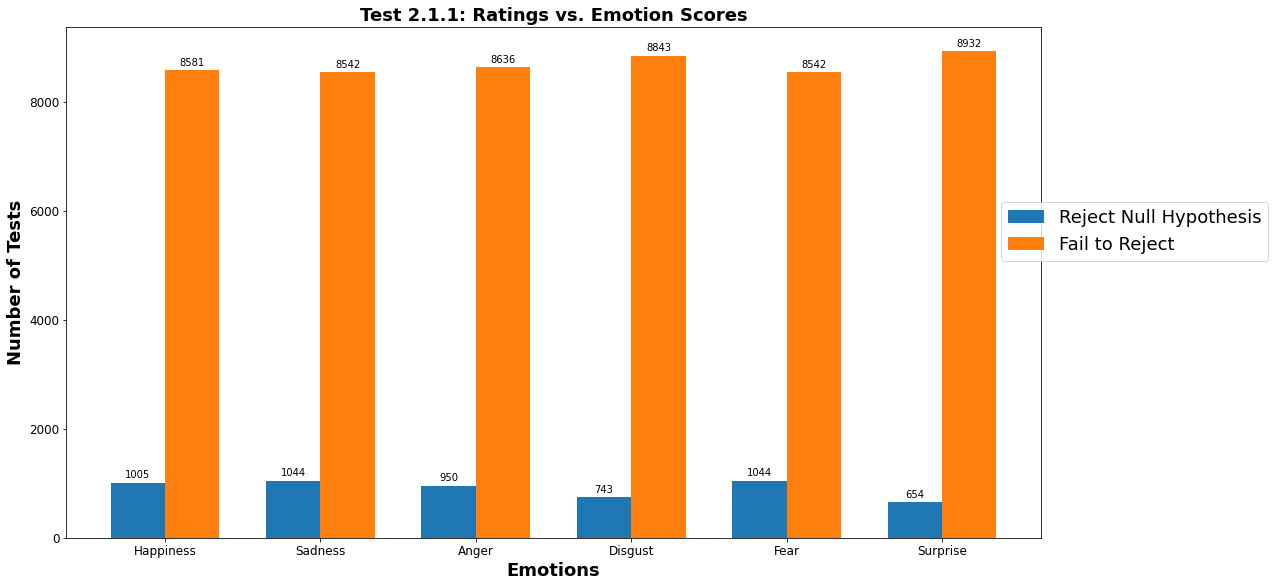

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.1.1: Ratings vs. Emotion Scores', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [44]:
# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_rat_cat_em= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })

In [45]:
r_coeff_rat_cat_em.shape

(633, 72)

In [46]:
r_coeff_rat_cat_em.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,21.0000,170.0000,449.0000,201.0000,84.0000,12.0000,21.0000,170.0000,449.0000,201.0000,84.0000,12.0000,5.0000,53.0000,90.0000,633.0000,175.0000,20.0000,5.0000,53.0000,90.0000,633.0000,175.0000,20.0000,21.0000,128.0000,246.0000,331.0000,131.0000,25.0000,21.0000,128.0000,246.0000,331.0000,131.0000,25.0000,12.0000,91.0000,138.0000,289.0000,131.0000,14.0000,12.0000,91.0000,138.0000,289.0000,131.0000,14.0000,17.0000,105.0000,152.0000,506.0000,176.0000,20.0000,17.0000,105.0000,152.0000,506.0000,176.0000,20.0000,16.0000,119.0000,217.0000,136.0000,89.0000,9.0000,16.0000,119.0000,217.0000,136.0000,89.0000,9.0000
mean,0.0053,0.0179,0.0207,0.0217,0.0194,0.0057,-0.5626,-0.3747,-0.1784,0.1783,0.3887,0.5403,0.0056,0.0236,0.0250,0.0176,0.0200,0.0069,-0.5666,-0.3840,-0.1938,0.1618,0.3827,0.5569,0.0053,0.0192,0.0216,0.0200,0.0200,0.0066,-0.5392,-0.3870,-0.1712,0.1850,0.3743,0.5602,0.0063,0.0257,0.0249,0.0235,0.0238,0.0047,-0.5488,-0.3755,-0.1818,0.1765,0.3860,0.5569,0.0054,0.0239,0.0229,0.0209,0.0184,0.0050,-0.5519,-0.3938,-0.1775,0.1752,0.3793,0.5704,0.0044,0.0196,0.0260,0.0264,0.0210,0.0070,-0.5457,-0.3816,-0.1836,0.1794,0.3924,0.5528
std,0.0060,0.0142,0.0157,0.0155,0.0143,0.0049,0.0597,0.0511,0.0639,0.0633,0.0544,0.0320,0.0060,0.0143,0.0153,0.0154,0.0142,0.0063,0.0416,0.0524,0.0606,0.0617,0.0522,0.0514,0.0063,0.0142,0.0153,0.0148,0.0136,0.0055,0.0377,0.0538,0.0624,0.0652,0.0521,0.0512,0.0049,0.0141,0.0150,0.0149,0.0152,0.0035,0.0381,0.0534,0.0664,0.0670,0.0562,0.0406,0.0059,0.0145,0.0155,0.0154,0.0150,0.0044,0.0464,0.0544,0.0636,0.0633,0.0566,0.0536,0.0045,0.0128,0.0149,0.0143,0.0150,0.0051,0.0464,0.0555,0.0672,0.0616,0.0589,0.0490
min,0.0001,0.0000,0.0000,0.0000,0.0002,0.0001,-0.7133,-0.4981,-0.2995,0.0348,0.3028,0.5091,0.0002,0.0005,0.0000,0.0000,0.0001,0.0000,-0.6233,-0.4972,-0.2989,0.0407,0.3001,0.5020,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,-0.6114,-0.4988,-0.2997,0.0434,0.3002,0.5016,0.0009,0.0008,0.0000,0.0000,0.0001,0.0004,-0.6344,-0.4957,-0.2994,0.0358,0.3008,0.5062,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6451,-0.4984,-0.2965,0.0408,0.3005,0.5033,0.0006,0.0001,0.0000,0.0004,0.0004,0.0000,-0.6840,-0.4927,-0.2985,0.0622,0.3007,0.5004
25%,0.0005,0.0054,0.0070,0.0062,0.0059,0.0020,-0.5973,-0.4108,-0.2279,0.1307,0.3433,0.5106,0.0010,0.0108,0.0109,0.0034,0.0077,0.0014,-0.5866,-0.4195,-0.2416,0.1120,0.3361,0.5205,0.0012,0.0065,0.0089,0.0067,0.0088,0.0019,-0.5652,-0.4240,-0.2175,0.1339,0.3317,0.5210,0.0018,0.0152,0.0123,0.0106,0.0107,0.0027,-0.5590,-0.4149,-0.2326,0.1183,0.3393,0.5276,0.0012,0.0123,0.0082,0.0058,0.0043,0.0014,-0.5630,-0.4370,-0.2197,0.1245,0.3298,0.5383,0.0021,0.0082,0.0135,0.0144,0.0089,0.0027,-0.5614,-0.4219,-0.2461,0.1282,0.3391,0.5128
50%,0.0035,0.0139,0.0176,0.0230,0.0184,0.0045,-0.5370,-0.3682,-0.1777,0.1732,0.3880,0.5272,0.0033,0.0226,0.0254,0.0139,0.0188,0.0061,-0.5643,-0.3822,-0.1916,0.150

In [47]:
'''
r_coeff_rat_cat_em.to_csv('r_coeff_rat_cat_em.csv', index=False)
files.download('r_coeff_rat_cat_em.csv')
'''

"\nr_coeff_rat_cat_em.to_csv('r_coeff_rat_cat_em.csv', index=False)\nfiles.download('r_coeff_rat_cat_em.csv')\n"

#### 2| ratings= [0.5 , 2] or ratings= [4 , 5] vs emotions

Instead of taking all rating votes (hypothesis test 1), below only the highest or lowest ratings will be considered, i.e. neutral ratings will be ignored.

Ratings are in range [0.5 , 2] and [4 , 5] respectively, with a scale of 0.5

In [48]:
from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    data1= df[df['userId']==unique_user]
    data1 = data1[(data1["rating"]==0.5) | (data1["rating"]==1) | (data1["rating"]==1.5) | (data1["rating"]==2)
    | (data1["rating"]==4) | (data1["rating"]==4.5) | (data1["rating"]==4.5) | (data1["rating"]==5)]
    data1 = data1.rating_cat.values

    
    data2= df[df['userId']==unique_user]
    data2 = data2[(data2["rating"]==0.5) | (data2["rating"]==1) | (data2["rating"]==1.5) | (data2["rating"]==2)
    | (data2["rating"]==4) | (data2["rating"]==4.5) | (data2["rating"]==4.5) | (data2["rating"]==5)]
    data2= data2[emotion].values
    

    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions): highest (4 to 5) and lowest ratings (0.5 to 2) per user")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))


The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions): highest (4 to 5) and lowest ratings (0.5 to 2) per user
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 46132
From this sample:

No correlation was found with regard to happiness emotion in 7588 number of tests
No correlation was found with regard to sadness emotion in 7614 number of tests
No correlation was found with regard to anger emotion in 7642 number of tests
No correlation was found with regard to disgust emotion in 7791 number of tests
No correlation was found with regard to fear emotion in 7591 number of tests
No correlation was found with regard to surprise emotion in 7906 number of 

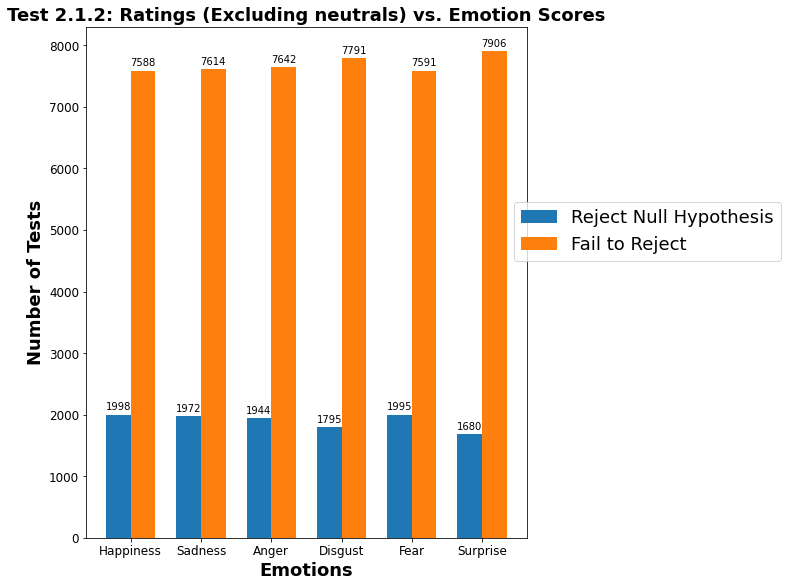

In [49]:


labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.1.2: Ratings (Excluding neutrals) vs. Emotion Scores', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [50]:


# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_ratings_low_high_em= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })


In [51]:
r_coeff_ratings_low_high_em.shape

(1320, 72)

In [52]:
r_coeff_ratings_low_high_em.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,33.0000,127.0000,267.0000,171.0000,87.0000,36.0000,33.0000,127.0000,267.0000,171.0000,87.0000,36.0000,17.0000,39.0000,63.0000,407.0000,126.0000,43.0000,17.0000,39.0000,63.0000,407.0000,126.0000,43.0000,37.0000,75.0000,176.0000,219.0000,124.0000,36.0000,37.0000,75.0000,176.0000,219.0000,124.0000,36.0000,28.0000,75.0000,116.0000,187.0000,80.0000,32.0000,28.0000,75.0000,116.0000,187.0000,80.0000,32.0000,25.0000,73.0000,141.0000,312.0000,129.0000,38.0000,25.0000,73.0000,141.0000,312.0000,129.0000,38.0000,33.0000,77.0000,110.0000,103.0000,60.0000,20.0000,33.0000,77.0000,110.0000,103.0000,60.0000,20.0000
mean,0.0153,0.0203,0.0215,0.0224,0.0245,0.0165,-0.5782,-0.3898,-0.1931,0.1917,0.3983,0.5871,0.0185,0.0290,0.0245,0.0184,0.0191,0.0166,-0.6003,-0.3757,-0.1977,0.1824,0.3796,0.5889,0.0164,0.0239,0.0205,0.0219,0.0223,0.0174,-0.5916,-0.3869,-0.1952,0.1888,0.3829,0.5953,0.0183,0.0256,0.0226,0.0251,0.0247,0.0144,-0.6136,-0.3862,-0.1950,0.1876,0.3873,0.5804,0.0116,0.0249,0.0230,0.0206,0.0192,0.0183,-0.6252,-0.3901,-0.1888,0.1951,0.3769,0.5812,0.0152,0.0247,0.0240,0.0255,0.0241,0.0200,-0.5978,-0.3837,-0.1891,0.1949,0.3981,0.5725
std,0.0162,0.0145,0.0157,0.0158,0.0150,0.0127,0.0529,0.0575,0.0600,0.0583,0.0517,0.0893,0.0159,0.0137,0.0153,0.0156,0.0150,0.0133,0.0687,0.0395,0.0570,0.0576,0.0567,0.0805,0.0149,0.0155,0.0158,0.0140,0.0158,0.0136,0.0720,0.0541,0.0577,0.0593,0.0537,0.0741,0.0128,0.0156,0.0157,0.0155,0.0137,0.0127,0.0990,0.0564,0.0597,0.0619,0.0594,0.0685,0.0138,0.0149,0.0157,0.0151,0.0139,0.0156,0.0929,0.0590,0.0581,0.0612,0.0564,0.0681,0.0121,0.0158,0.0140,0.0142,0.0141,0.0134,0.0882,0.0583,0.0583,0.0542,0.0550,0.0504
min,0.0000,0.0000,0.0000,0.0000,0.0001,0.0001,-0.7198,-0.4997,-0.2994,0.0522,0.3036,0.5033,0.0004,0.0009,0.0000,0.0000,0.0000,0.0000,-0.7559,-0.4604,-0.2958,0.0686,0.3007,0.5010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,-0.8367,-0.4906,-0.2966,0.0503,0.3011,0.5016,0.0005,0.0004,0.0000,0.0000,0.0024,0.0005,-0.8452,-0.4926,-0.2986,0.0536,0.3055,0.5014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8216,-0.4986,-0.2952,0.0557,0.3006,0.5010,0.0000,0.0004,0.0000,0.0001,0.0004,0.0006,-0.8402,-0.4986,-0.2996,0.0872,0.3081,0.5028
25%,0.0034,0.0086,0.0074,0.0081,0.0100,0.0067,-0.6090,-0.4318,-0.2423,0.1444,0.3563,0.5258,0.0061,0.0176,0.0122,0.0034,0.0042,0.0063,-0.6316,-0.4104,-0.2392,0.1375,0.3300,0.5327,0.0024,0.0098,0.0060,0.0107,0.0078,0.0060,-0.6186,-0.4310,-0.2429,0.1453,0.3373,0.5369,0.0072,0.0095,0.0072,0.0115,0.0155,0.0051,-0.6688,-0.4291,-0.2423,0.1403,0.3371,0.5295,0.0014,0.0120,0.0080,0.0058,0.0070,0.0029,-0.6954,-0.4280,-0.2363,0.1457,0.3306,0.5284,0.0059,0.0086,0.0132,0.0129,0.0118,0.0071,-0.6268,-0.4280,-0.2351,0.1524,0.3507,0.5320
50%,0.0091,0.0179,0.0192,0.0225,0.0277,0.0146,-0.5678,-0.3875,-0.1937,0.1932,0.3989,0.5635,0.0142,0.0311,0.0249,0.0156,0.0180,0.0116,-0.5907,-0.3778,-0.1917,0.1762,0.

In [53]:
'''
from google.colab import files
r_coeff_ratings_low_high_em.to_csv('r_coeff_ratings_low_high_em.csv', index=False)
files.download('r_coeff_ratings_low_high_em.csv')
'''

"\nfrom google.colab import files\nr_coeff_ratings_low_high_em.to_csv('r_coeff_ratings_low_high_em.csv', index=False)\nfiles.download('r_coeff_ratings_low_high_em.csv')\n"

#### 3| (rating= 0.5 / 1 / 1.5 / 2) vs (emotions)

In [54]:


from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    # only ratings with votes: 0.5/1/1.5/2
    # meaning the lowest ratings
    data1= df[df['userId']==unique_user]
    data1= data1[(data1["rating"]==0.5)| (data1["rating"]==1) | (data1["rating"]==1.5) | (data1["rating"]==2)]
    data1 = data1.rating.values

    
    data2= df[df['userId']==unique_user]
    data2= data2[(data2["rating"]==0.5)| (data2["rating"]==1) | (data2["rating"]==1.5) | (data2["rating"]==2)]
    data2= data2[emotion].values
    

    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (ratings: 0.5/1/1.5/2) vs (6 emotions) per user")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))


The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (ratings: 0.5/1/1.5/2) vs (6 emotions) per user
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 33496
From this sample:

No correlation was found with regard to happiness emotion in 5571 number of tests
No correlation was found with regard to sadness emotion in 5586 number of tests
No correlation was found with regard to anger emotion in 5562 number of tests
No correlation was found with regard to disgust emotion in 5598 number of tests
No correlation was found with regard to fear emotion in 5560 number of tests
No correlation was found with regard to surprise emotion in 5619 number of tests
################

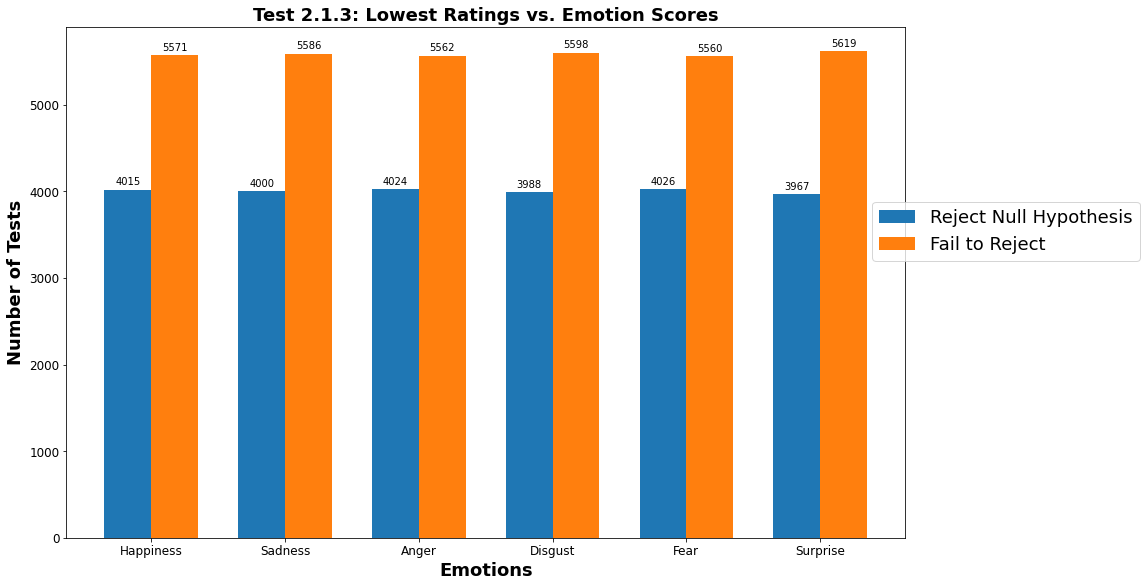

In [55]:
labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.1.3: Lowest Ratings vs. Emotion Scores', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [56]:

# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_ratings_05_to_2_em= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })



In [57]:
r_coeff_ratings_05_to_2_em.shape

(3626, 72)

In [58]:
r_coeff_ratings_05_to_2_em.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,109.0000,33.0000,30.0000,34.0000,30.0000,108.0000,291.0000,33.0000,30.0000,34.0000,30.0000,274.0000,107.0000,20.0000,24.0000,38.0000,40.0000,100.0000,267.0000,20.0000,24.0000,38.0000,40.0000,288.0000,103.0000,31.0000,31.0000,30.0000,44.0000,114.0000,262.0000,31.0000,31.0000,30.0000,44.0000,303.0000,96.0000,36.0000,27.0000,26.0000,31.0000,101.0000,272.0000,36.0000,27.0000,26.0000,31.0000,273.0000,107.0000,31.0000,26.0000,32.0000,38.0000,121.0000,277.0000,31.0000,26.0000,32.0000,38.0000,299.0000,93.0000,32.0000,18.0000,27.0000,21.0000,105.0000,279.0000,32.0000,18.0000,27.0000,21.0000,267.0000
mean,0.0188,0.0281,0.0279,0.0252,0.0215,0.0207,-0.9037,-0.3998,-0.1855,0.2133,0.4155,0.9063,0.0195,0.0318,0.0259,0.0239,0.0255,0.0230,-0.9130,-0.4035,-0.2169,0.1858,0.4028,0.9178,0.0187,0.0253,0.0184,0.0249,0.0266,0.0210,-0.9128,-0.3934,-0.1993,0.2021,0.4019,0.9012,0.0192,0.0259,0.0223,0.0240,0.0218,0.0213,-0.9248,-0.4092,-0.2168,0.2027,0.4013,0.9040,0.0191,0.0276,0.0234,0.0216,0.0267,0.0206,-0.9113,-0.3999,-0.2114,0.1978,0.4007,0.8988,0.0222,0.0271,0.0328,0.0281,0.0264,0.0200,-0.9139,-0.4084,-0.2328,0.1915,0.3905,0.9139
std,0.0151,0.0132,0.0163,0.0151,0.0159,0.0166,0.1551,0.0491,0.0622,0.0499,0.0561,0.1551,0.0165,0.0138,0.0149,0.0139,0.0154,0.0168,0.1454,0.0527,0.0494,0.0702,0.0593,0.1456,0.0160,0.0125,0.0144,0.0143,0.0144,0.0161,0.1476,0.0597,0.0519,0.0643,0.0550,0.1611,0.0160,0.0146,0.0129,0.0161,0.0143,0.0157,0.1353,0.0467,0.0493,0.0751,0.0599,0.1564,0.0158,0.0148,0.0163,0.0169,0.0130,0.0162,0.1483,0.0596,0.0543,0.0624,0.0650,0.1570,0.0157,0.0151,0.0120,0.0122,0.0123,0.0163,0.1524,0.0546,0.0578,0.0584,0.0642,0.1446
min,0.0000,0.0006,0.0009,0.0002,0.0011,0.0000,-1.0000,-0.4787,-0.2946,0.1067,0.3001,0.5037,0.0000,0.0077,0.0005,0.0026,0.0009,0.0000,-1.0000,-0.4801,-0.2971,0.0597,0.3012,0.5017,0.0000,0.0028,0.0000,0.0003,0.0003,0.0000,-1.0000,-0.4986,-0.2939,0.0855,0.3010,0.5007,0.0000,0.0004,0.0006,0.0008,0.0015,0.0000,-1.0000,-0.4942,-0.2738,0.0735,0.3013,0.5051,0.0000,0.0028,0.0007,0.0004,0.0008,0.0000,-1.0000,-0.4986,-0.2970,0.0651,0.3005,0.5004,0.0000,0.0002,0.0107,0.0075,0.0114,0.0000,-1.0000,-0.4986,-0.2951,0.0859,0.3009,0.5007
25%,0.0047,0.0180,0.0128,0.0155,0.0094,0.0041,-1.0000,-0.4372,-0.2294,0.1783,0.3772,0.8319,0.0029,0.0244,0.0122,0.0119,0.0130,0.0077,-1.0000,-0.4324,-0.2579,0.1215,0.3645,0.8755,0.0015,0.0156,0.0062,0.0163,0.0139,0.0047,-1.0000,-0.4467,-0.2247,0.1453,0.3569,0.8281,0.0054,0.0140,0.0103,0.0091,0.0100,0.0058,-1.0000,-0.4446,-0.2640,0.1381,0.3552,0.8248,0.0034,0.0145,0.0085,0.0046,0.0199,0.0048,-1.0000,-0.4461,-0.2564,0.1602,0.3412,0.7906,0.0076,0.0166,0.0236,0.0202,0.0136,0.0039,-1.0000,-0.4409,-0.2829,0.1514,0.3198,0.8531
50%,0.0165,0.0305,0.0337,0.0238,0.0166,0.0213,-1.0000,-0.4089,-0.1827,0.2087,0.4311,1.0000,0.0163,0.0337,0.0250,0.0252,0.0270,0.0248,-1.0000,-0.4180,-0.2155,0.1909,0.3951,1.0

In [59]:
'''
from google.colab import files

r_coeff_ratings_05_to_2_em.to_csv('r_coeff_ratings_05_to_2_em.csv', index=False)
files.download('r_coeff_ratings_05_to_2_em.csv')
'''

"\nfrom google.colab import files\n\nr_coeff_ratings_05_to_2_em.to_csv('r_coeff_ratings_05_to_2_em.csv', index=False)\nfiles.download('r_coeff_ratings_05_to_2_em.csv')\n"

#### 4| (rating= 4 / 4.5 / 5) vs emotions

In [60]:

from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    # only ratings with votes: 4/4.5/5
    # meaning the greatest rating votes
    data1= df[df['userId']==unique_user]
    data1= data1[(data1["rating"]==4)| (data1["rating"]==4.5) | (data1["rating"]== 5)]
    data1 = data1.rating.values

    
    data2= df[df['userId']==unique_user]
    data2= data2[(data2["rating"]==4)| (data2["rating"]== 4.5) | (data2["rating"]== 5)]
    data2= data2[emotion].values
    

    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (ratings (4 or 4.5 or 5) vs 6 emotions) per user")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))



The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (ratings (4 or 4.5 or 5) vs 6 emotions) per user
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 53121
From this sample:

No correlation was found with regard to happiness emotion in 8826 number of tests
No correlation was found with regard to sadness emotion in 8878 number of tests
No correlation was found with regard to anger emotion in 8814 number of tests
No correlation was found with regard to disgust emotion in 8956 number of tests
No correlation was found with regard to fear emotion in 8791 number of tests
No correlation was found with regard to surprise emotion in 8856 number of tests
###############

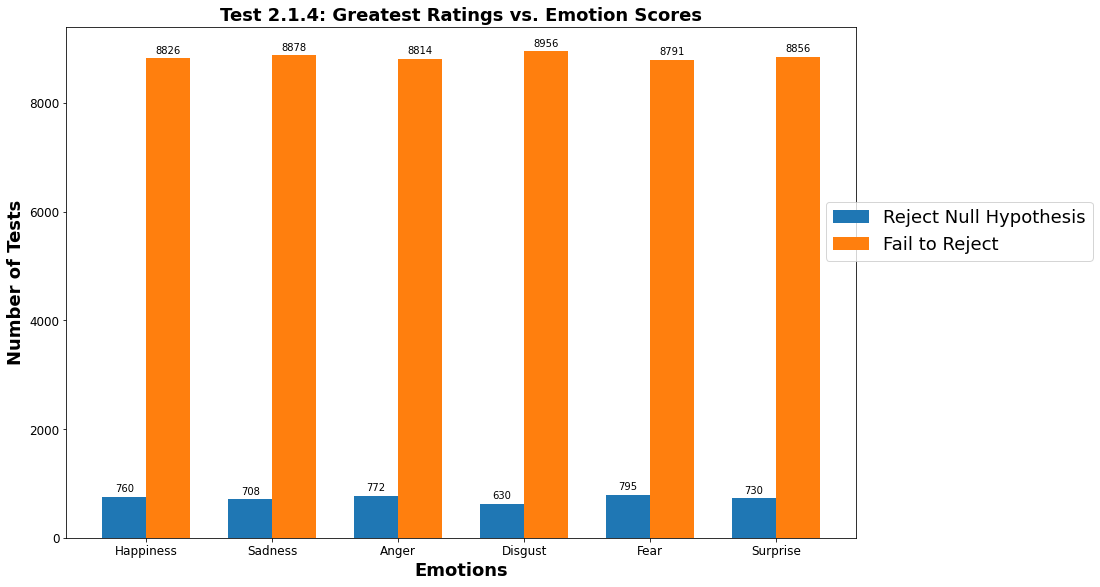

In [61]:


labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.1.4: Greatest Ratings vs. Emotion Scores', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [62]:
# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_ratings_4_to_5_em= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })



In [63]:
r_coeff_ratings_4_to_5_em.shape

(228, 72)

In [64]:
r_coeff_ratings_4_to_5_em.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,70.0000,119.0000,208.0000,83.0000,72.0000,57.0000,71.0000,119.0000,208.0000,83.0000,72.0000,58.0000,53.0000,74.0000,65.0000,204.0000,104.0000,57.0000,54.0000,74.0000,65.0000,204.0000,104.0000,58.0000,65.0000,101.0000,108.0000,161.0000,111.0000,75.0000,66.0000,101.0000,108.0000,161.0000,111.0000,76.0000,38.0000,79.0000,65.0000,122.0000,115.0000,60.0000,40.0000,79.0000,65.0000,122.0000,115.0000,60.0000,47.0000,73.0000,82.0000,212.0000,151.0000,79.0000,49.0000,73.0000,82.0000,212.0000,151.0000,79.0000,65.0000,138.0000,140.0000,90.0000,91.0000,55.0000,66.0000,138.0000,140.0000,90.0000,91.0000,56.0000
mean,0.0173,0.0232,0.0242,0.0275,0.0233,0.0197,-0.6129,-0.3814,-0.1992,0.2162,0.3987,0.6333,0.0208,0.0258,0.0290,0.0246,0.0238,0.0186,-0.6268,-0.4015,-0.2103,0.1944,0.3887,0.6209,0.0163,0.0234,0.0270,0.0264,0.0257,0.0179,-0.6335,-0.3885,-0.2099,0.2058,0.3860,0.6274,0.0185,0.0273,0.0306,0.0283,0.0238,0.0194,-0.6280,-0.3865,-0.2126,0.2010,0.3919,0.5937,0.0204,0.0232,0.0258,0.0243,0.0203,0.0202,-0.6250,-0.3936,-0.2037,0.1996,0.3875,0.6028,0.0184,0.0234,0.0264,0.0263,0.0261,0.0208,-0.6233,-0.3872,-0.2048,0.2117,0.3962,0.6551
std,0.0151,0.0153,0.0144,0.0152,0.0158,0.0152,0.1059,0.0539,0.0512,0.0574,0.0529,0.1097,0.0145,0.0143,0.0130,0.0137,0.0158,0.0141,0.1167,0.0590,0.0576,0.0563,0.0542,0.1109,0.0135,0.0156,0.0132,0.0152,0.0153,0.0140,0.1176,0.0588,0.0597,0.0555,0.0561,0.1097,0.0149,0.0140,0.0142,0.0154,0.0139,0.0150,0.1267,0.0567,0.0526,0.0579,0.0524,0.0739,0.0139,0.0165,0.0135,0.0142,0.0150,0.0146,0.1120,0.0528,0.0551,0.0565,0.0555,0.0991,0.0155,0.0137,0.0139,0.0144,0.0152,0.0149,0.1171,0.0566,0.0549,0.0588,0.0536,0.1298
min,0.0000,0.0000,0.0000,0.0009,0.0000,0.0003,-1.0000,-0.4994,-0.2990,0.0708,0.3011,0.5048,0.0003,0.0000,0.0001,0.0000,0.0002,0.0000,-1.0000,-0.4991,-0.2975,0.0620,0.3006,0.5007,0.0001,0.0000,0.0002,0.0001,0.0002,0.0001,-1.0000,-0.4980,-0.2979,0.0802,0.3024,0.5034,0.0001,0.0008,0.0006,0.0001,0.0002,0.0000,-1.0000,-0.4967,-0.2952,0.0729,0.3021,0.5020,0.0004,0.0000,0.0002,0.0000,0.0001,0.0000,-1.0000,-0.4881,-0.2968,0.0589,0.3033,0.5007,0.0001,0.0001,0.0004,0.0011,0.0003,0.0000,-1.0000,-0.4991,-0.2947,0.0794,0.3028,0.5010
25%,0.0046,0.0084,0.0113,0.0147,0.0073,0.0068,-0.6250,-0.4220,-0.2328,0.1783,0.3637,0.5454,0.0082,0.0153,0.0215,0.0144,0.0097,0.0049,-0.6928,-0.4538,-0.2635,0.1495,0.3459,0.5447,0.0049,0.0076,0.0166,0.0136,0.0118,0.0048,-0.7157,-0.4432,-0.2570,0.1641,0.3346,0.5425,0.0057,0.0154,0.0190,0.0167,0.0123,0.0051,-0.6611,-0.4319,-0.2498,0.1541,0.3502,0.5314,0.0058,0.0084,0.0157,0.0130,0.0065,0.0066,-0.6833,-0.4418,-0.2472,0.1529,0.3382,0.5332,0.0045,0.0108,0.0134,0.0153,0.0159,0.0074,-0.7063,-0.4366,-0.2486,0.1676,0.3564,0.5534
50%,0.0134,0.0229,0.0249,0.0263,0.0211,0.0152,-0.5826,-0.3689,-0.2032,0.2242,0.4019,0.6153,0.0209,0.0256,0.0326,0.0234,0.0245,0.0155,-0.5925,-0.4039,-0.2062,0.1997,0.38

In [65]:
'''
from google.colab import files

r_coeff_ratings_4_to_5_em.to_csv('r_coeff_ratings_4_to_5_em.csv', index=False)
files.download('r_coeff_ratings_4_to_5_em.csv')
'''

"\nfrom google.colab import files\n\nr_coeff_ratings_4_to_5_em.to_csv('r_coeff_ratings_4_to_5_em.csv', index=False)\nfiles.download('r_coeff_ratings_4_to_5_em.csv')\n"

### 2b| Sets of Emotion Scores

#### 5|  set 1 emotions vs set2 emotions (per unique user)


Taking 2 sets (by half) of movies watched per unique user. If e.g. a user has watched 100 movies, the first set will have the first 50 movies and the 2nd the rest of the 50 movies.

If the number of movies watched is odd, then the last movie will be ignored so that there are two equal sets of movies

A correlation (or not) will be aimed to be found among these sets of movies per unique user with regard to their respective emotion scores

As this holds true for all hypothesis tests, users have watched  at least  20 movies (one set of movies consists of at least 10 movies). The 9,586 users have watched totally 150 movies in average

In [66]:
from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    data1= df[df['userId']==unique_user]
    data1= data1[:len(data1)//2]
    data1=data1[emotion].values

    data2= df[df['userId']==unique_user]
    data2= data2[len(data2)//2:]
    data2 = data2[emotion].values

    if len(data1) != len(data2):
      data1= df[df['userId']==unique_user]
      data1= data1[:(len(data1)//2)+1]
      data1=data1[emotion].values


    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests detecting the correlation among the emmotion score of these two sets of movies per unique user")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))



The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests detecting the correlation among the emmotion score of these two sets of movies per unique user
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 54593
From this sample:

No correlation was found with regard to happiness emotion in 9091 number of tests
No correlation was found with regard to sadness emotion in 9079 number of tests
No correlation was found with regard to anger emotion in 9121 number of tests
No correlation was found with regard to disgust emotion in 9058 number of tests
No correlation was found with regard to fear emotion in 9114 number of tests
No correlation was found with regard to surprise e

In [67]:

# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_setofmovies= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })



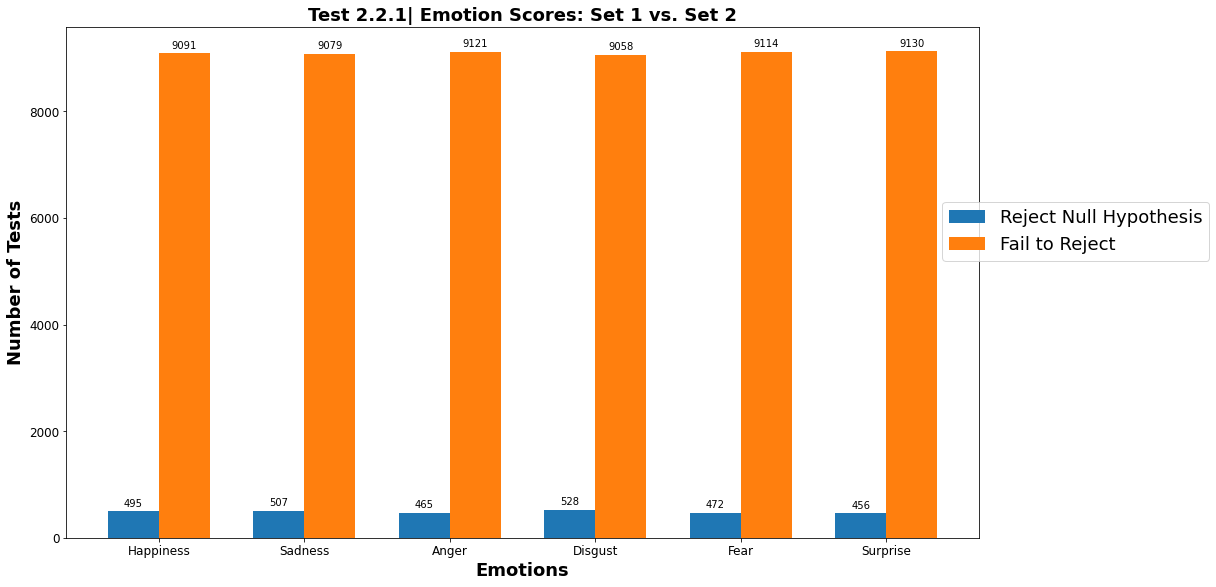

In [68]:
labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.2.1| Emotion Scores: Set 1 vs. Set 2', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [69]:
r_coeff_setofmovies.shape

(106, 72)

In [70]:
r_coeff_setofmovies.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,75.0000,100.0000,74.0000,93.0000,83.0000,70.0000,75.0000,100.0000,74.0000,93.0000,83.0000,70.0000,65.0000,83.0000,106.0000,78.0000,94.0000,81.0000,65.0000,83.0000,106.0000,78.0000,94.0000,81.0000,62.0000,90.0000,77.0000,92.0000,87.0000,57.0000,62.0000,90.0000,77.0000,92.0000,87.0000,57.0000,74.0000,100.0000,105.0000,82.0000,100.0000,67.0000,74.0000,100.0000,105.0000,82.0000,100.0000,67.0000,57.0000,82.0000,79.0000,90.0000,100.0000,64.0000,57.0000,82.0000,79.0000,90.0000,100.0000,64.0000,71.0000,93.0000,70.0000,68.0000,86.0000,68.0000,71.0000,93.0000,70.0000,68.0000,86.0000,68.0000
mean,0.0218,0.0264,0.0283,0.0285,0.0262,0.0198,-0.6016,-0.3969,-0.2022,0.2194,0.3869,0.6081,0.0173,0.0260,0.0264,0.0274,0.0259,0.0215,-0.6210,-0.3969,-0.2038,0.2130,0.3963,0.6194,0.0193,0.0238,0.0279,0.0287,0.0271,0.0173,-0.6174,-0.4015,-0.2196,0.2052,0.4074,0.6088,0.0195,0.0264,0.0293,0.0255,0.0261,0.0211,-0.6004,-0.3855,-0.1967,0.2085,0.3900,0.5990,0.0160,0.0241,0.0290,0.0266,0.0246,0.0193,-0.6187,-0.4047,-0.2082,0.2112,0.3964,0.6105,0.0209,0.0260,0.0302,0.0295,0.0240,0.0193,-0.6112,-0.3956,-0.2096,0.2175,0.3930,0.6203
std,0.0142,0.0133,0.0134,0.0140,0.0138,0.0152,0.0753,0.0596,0.0603,0.0523,0.0563,0.0705,0.0143,0.0135,0.0136,0.0145,0.0152,0.0131,0.0897,0.0562,0.0586,0.0610,0.0568,0.0746,0.0135,0.0145,0.0120,0.0136,0.0141,0.0137,0.0777,0.0553,0.0555,0.0582,0.0581,0.0774,0.0147,0.0144,0.0132,0.0132,0.0133,0.0148,0.0759,0.0523,0.0614,0.0613,0.0570,0.0822,0.0135,0.0138,0.0135,0.0136,0.0139,0.0137,0.0876,0.0578,0.0584,0.0597,0.0597,0.0768,0.0144,0.0150,0.0139,0.0155,0.0151,0.0151,0.0804,0.0555,0.0544,0.0521,0.0583,0.0807
min,0.0001,0.0000,0.0005,0.0013,0.0011,0.0002,-0.8681,-0.4981,-0.2993,0.1131,0.3029,0.5002,0.0002,0.0023,0.0008,0.0005,0.0000,0.0000,-0.8811,-0.4985,-0.2939,0.0738,0.3014,0.5020,0.0000,0.0001,0.0021,0.0007,0.0001,0.0002,-0.8112,-0.4931,-0.2984,0.0811,0.3037,0.5020,0.0000,0.0001,0.0017,0.0013,0.0006,0.0003,-0.8791,-0.4977,-0.2995,0.0625,0.3013,0.5000,0.0002,0.0005,0.0038,0.0003,0.0008,0.0003,-0.8132,-0.4965,-0.2986,0.0862,0.3019,0.5029,0.0000,0.0003,0.0012,0.0008,0.0013,0.0001,-0.8392,-0.4960,-0.2991,0.0745,0.3007,0.5025
25%,0.0073,0.0151,0.0175,0.0173,0.0138,0.0080,-0.6524,-0.4470,-0.2567,0.1755,0.3332,0.5510,0.0050,0.0148,0.0157,0.0144,0.0133,0.0112,-0.6752,-0.4432,-0.2581,0.1595,0.3434,0.5659,0.0078,0.0116,0.0188,0.0176,0.0153,0.0053,-0.6654,-0.4456,-0.2675,0.1646,0.3516,0.5441,0.0069,0.0142,0.0182,0.0147,0.0147,0.0084,-0.6341,-0.4292,-0.2493,0.1653,0.3404,0.5294,0.0038,0.0128,0.0184,0.0153,0.0132,0.0078,-0.6643,-0.4548,-0.2551,0.1718,0.3448,0.5459,0.0088,0.0134,0.0182,0.0182,0.0103,0.0064,-0.6447,-0.4417,-0.2572,0.1769,0.3428,0.5627
50%,0.0209,0.0259,0.0271,0.0308,0.0251,0.0146,-0.5821,-0.4010,-0.2005,0.2281,0.3813,0.6029,0.0141,0.0270,0.0289,0.0272,0.0269,0.0208,-0.6015,-0.3897,-0.2062,0.2219,0.3979,0.6088,0.0165

In [71]:
'''

from google.colab import files

r_coeff_setofmovies.to_csv('r_coeff_setofmovies.csv', index=False)
files.download('r_coeff_setofmovies.csv')

'''

"\n\nfrom google.colab import files\n\nr_coeff_setofmovies.to_csv('r_coeff_setofmovies.csv', index=False)\nfiles.download('r_coeff_setofmovies.csv')\n\n"

#### 6| set1 emotions vs set2 emotions: from movies with ratings 0.5->2 per unique user

Same as test 7, but here taking those sets of movies that the user has voted the least, i.e. ratings in range [0.5 , 2]

In [72]:
from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    data1= df[df['userId']==unique_user]
    data1= data1[(data1["rating"]==0.5) | (data1["rating"]==1) | (data1["rating"]==1.5) | (data1["rating"]==2)]
    data1= data1[:len(data1)//2]
    data1=data1[emotion].values

    data2= df[df['userId']==unique_user]
    data2= data2[(data2["rating"]==0.5) | (data2["rating"]==1) | (data2["rating"]==1.5) | (data2["rating"]==2)]
    data2= data2[len(data2)//2:]
    data2 = data2[emotion].values

    
    if len(data1) != len(data2):
      data1= df[df['userId']==unique_user]
      data1= data1[(data1["rating"]==0.5) | (data1["rating"]==1) | (data1["rating"]==1.5) | (data1["rating"]==2)]
      data1= data1[:(len(data1)//2)+1]
      data1=data1[emotion].values
      


    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among\n two sets of movies per unique user with regard to those movies that the user has voted with ratings 0.5/1/1.5/2")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))



The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among
 two sets of movies per unique user with regard to those movies that the user has voted with ratings 0.5/1/1.5/2
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 28290
From this sample:

No correlation was found with regard to happiness emotion in 4729 number of tests
No correlation was found with regard to sadness emotion in 4721 number of tests
No correlation was found with regard to anger emotion in 4714 number of tests
No correlation was found with regard to disgust emotion in 4708 number of tests
No correlation was found with regard to fear emotion in 4715 num

In [73]:
# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_sets_rat_05_to_2= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })


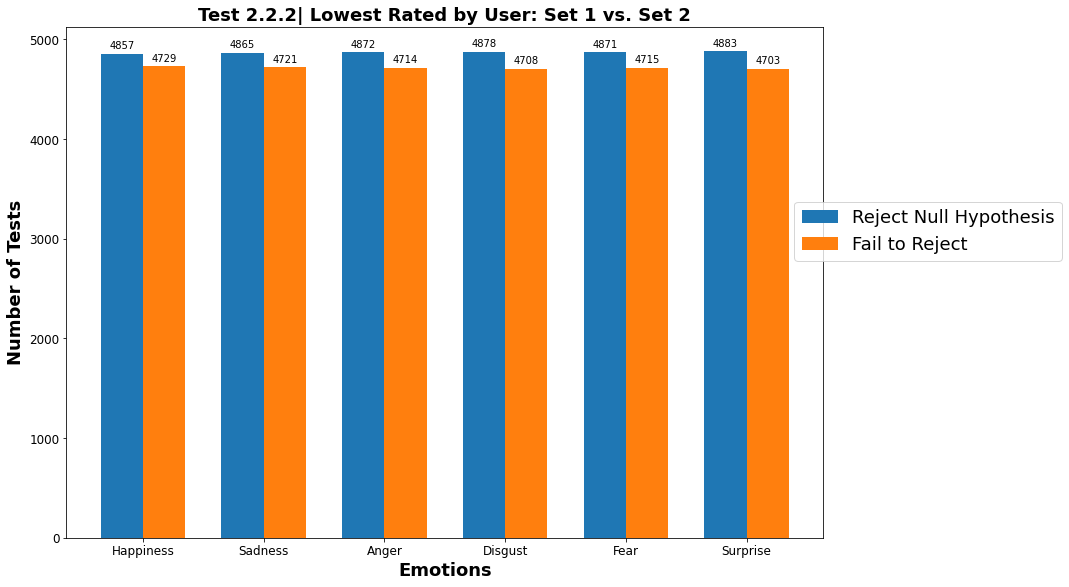

In [74]:


labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.2.2| Lowest Rated by User: Set 1 vs. Set 2', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [75]:
r_coeff_sets_rat_05_to_2.shape

(3829, 72)

In [76]:
r_coeff_sets_rat_05_to_2.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,278.0000,15.0000,8.0000,8.0000,11.0000,210.0000,1053.0000,15.0000,8.0000,8.0000,11.0000,739.0000,279.0000,13.0000,5.0000,8.0000,13.0000,220.0000,1035.0000,13.0000,5.0000,8.0000,13.0000,768.0000,258.0000,14.0000,10.0000,6.0000,11.0000,246.0000,1002.0000,14.0000,10.0000,6.0000,11.0000,806.0000,274.0000,19.0000,8.0000,5.0000,19.0000,226.0000,1059.0000,19.0000,8.0000,5.0000,19.0000,745.0000,280.0000,16.0000,10.0000,9.0000,13.0000,216.0000,1041.0000,16.0000,10.0000,9.0000,13.0000,759.0000,279.0000,17.0000,7.0000,9.0000,12.0000,232.0000,1049.0000,17.0000,7.0000,9.0000,12.0000,766.0000
mean,0.0062,0.0302,0.0339,0.0174,0.0263,0.0079,-0.9837,-0.3768,-0.2013,0.2218,0.4101,0.9787,0.0084,0.0231,0.0208,0.0306,0.0282,0.0088,-0.9814,-0.4068,-0.2611,0.2118,0.4179,0.9783,0.0089,0.0294,0.0250,0.0321,0.0244,0.0093,-0.9829,-0.4025,-0.2437,0.2431,0.4024,0.9796,0.0068,0.0273,0.0367,0.0271,0.0280,0.0095,-0.9856,-0.4172,-0.2303,0.2071,0.4029,0.9767,0.0080,0.0322,0.0242,0.0247,0.0342,0.0080,-0.9810,-0.4256,-0.2063,0.2146,0.4208,0.9798,0.0084,0.0304,0.0311,0.0340,0.0315,0.0090,-0.9791,-0.4263,-0.2308,0.2315,0.4279,0.9768
std,0.0128,0.0145,0.0149,0.0094,0.0114,0.0142,0.0691,0.0562,0.0510,0.0570,0.0690,0.0781,0.0151,0.0144,0.0153,0.0108,0.0142,0.0151,0.0711,0.0609,0.0261,0.0549,0.0553,0.0778,0.0148,0.0120,0.0194,0.0043,0.0124,0.0159,0.0677,0.0513,0.0291,0.0482,0.0488,0.0706,0.0137,0.0139,0.0086,0.0112,0.0144,0.0157,0.0625,0.0547,0.0424,0.0763,0.0577,0.0817,0.0148,0.0154,0.0154,0.0136,0.0129,0.0142,0.0729,0.0473,0.0429,0.0642,0.0602,0.0740,0.0144,0.0132,0.0145,0.0131,0.0145,0.0153,0.0777,0.0499,0.0352,0.0504,0.0544,0.0805
min,0.0000,0.0029,0.0048,0.0052,0.0058,0.0000,-1.0000,-0.4677,-0.2877,0.1185,0.3189,0.5029,0.0000,0.0009,0.0004,0.0098,0.0021,0.0000,-1.0000,-0.4951,-0.2974,0.1254,0.3138,0.5235,0.0000,0.0039,0.0044,0.0266,0.0068,0.0000,-1.0000,-0.4654,-0.2925,0.1682,0.3021,0.5009,0.0000,0.0028,0.0189,0.0130,0.0006,0.0000,-1.0000,-0.4985,-0.2952,0.1089,0.3006,0.5026,0.0000,0.0018,0.0004,0.0083,0.0123,0.0000,-1.0000,-0.4877,-0.2593,0.1188,0.3120,0.5059,0.0000,0.0014,0.0044,0.0138,0.0033,0.0000,-1.0000,-0.4912,-0.2826,0.1558,0.3321,0.5123
25%,0.0000,0.0213,0.0289,0.0098,0.0209,0.0000,-1.0000,-0.4247,-0.2249,0.1964,0.3516,1.0000,0.0000,0.0147,0.0129,0.0260,0.0169,0.0000,-1.0000,-0.4617,-0.2796,0.1774,0.3673,1.0000,0.0000,0.0236,0.0095,0.0289,0.0143,0.0000,-1.0000,-0.4405,-0.2612,0.2199,0.3727,1.0000,0.0000,0.0164,0.0349,0.0179,0.0175,0.0000,-1.0000,-0.4665,-0.2521,0.1461,0.3704,1.0000,0.0000,0.0233,0.0135,0.0149,0.0252,0.0000,-1.0000,-0.4618,-0.2426,0.1606,0.3787,1.0000,0.0000,0.0219,0.0259,0.0245,0.0185,0.0000,-1.0000,-0.4545,-0.2521,0.1907,0.3858,1.0000
50%,0.0000,0.0332,0.0349,0.0174,0.0289,0.0000,-1.0000,-0.3675,-0.1937,0.2284,0.4008,1.0000,0.0000,0.0211,0.0200,0.0307,0.0320,0.0000,-1.0000,-0.4121,-0.2454,0.2023,0.4327,1.0000,0.0000,0

In [77]:
'''
from google.colab import files

r_coeff_sets_rat_05_to_2.to_csv('r_coeff_sets_rat_05_to_2.csv', index=False)
files.download('r_coeff_sets_rat_05_to_2.csv')
'''

"\nfrom google.colab import files\n\nr_coeff_sets_rat_05_to_2.to_csv('r_coeff_sets_rat_05_to_2.csv', index=False)\nfiles.download('r_coeff_sets_rat_05_to_2.csv')\n"

#### 7| set1 emotions vs set2 emotions (from movies with ratings 4->5) per unique user

Same as test 8, but insted of taking the worst here we take the greatest voted movies by the user, i.e. movies with ratings in range [4, 5]

In [78]:


from scipy.stats import spearmanr

# assigning the prepared df "ratings_emotions_test_20" as 'df' for simplicity in the for-loop
df= ratings_emotions_test_20

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:


    data1= df[df['userId']==unique_user]
    data1= data1[(data1["rating"]==4) | (data1["rating"]==4.5) | (data1["rating"]==5)]
    data1= data1[:len(data1)//2]
    data1=data1[emotion].values

    data2= df[df['userId']==unique_user]
    data2= data2[(data2["rating"]==4) | (data2["rating"]==4.5) | (data2["rating"]==5)]
    data2= data2[len(data2)//2:]
    data2 = data2[emotion].values

    # in order to take an even number of sets
    # otherwise samples' sizes would be inconsistent and an error would occur
    if len(data1) != len(data2):
      data1= df[df['userId']==unique_user]
      data1= data1[(data1["rating"]==4) | (data1["rating"]==4.5) | (data1["rating"]==5)]
      data1= data1[:(len(data1)//2)+1]
      data1=data1[emotion].values
      


    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(df.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among\n two sets of movies per unique user and per emotion with regard to those movies that the user has voted with ratings 4/4.5/5")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))


The tests were conducted in 9586 unique users.
A total number of 22892 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among
 two sets of movies per unique user and per emotion with regard to those movies that the user has voted with ratings 4/4.5/5
Therefore, the total number of tests conducted is: 57516
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 54028
From this sample:

No correlation was found with regard to happiness emotion in 8992 number of tests
No correlation was found with regard to sadness emotion in 9006 number of tests
No correlation was found with regard to anger emotion in 9052 number of tests
No correlation was found with regard to disgust emotion in 8984 number of tests
No correlation was found with regard to fear emotion

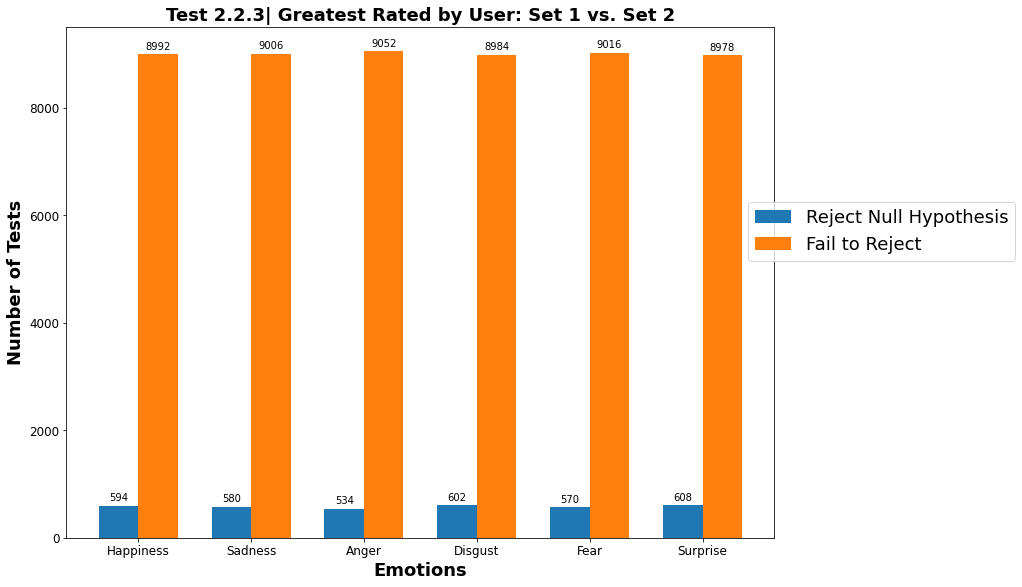

In [79]:
labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.2.3| Greatest Rated by User: Set 1 vs. Set 2', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [80]:

# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_sets_rat_4_to_5= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })

In [81]:
r_coeff_sets_rat_4_to_5.shape

(185, 72)

In [82]:
r_coeff_sets_rat_4_to_5.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,138.0000,88.0000,51.0000,35.0000,87.0000,140.0000,162.0000,88.0000,51.0000,35.0000,87.0000,149.0000,149.0000,75.0000,55.0000,37.0000,84.0000,125.0000,172.0000,75.0000,55.0000,37.0000,84.0000,135.0000,148.0000,73.0000,45.0000,41.0000,59.0000,113.0000,168.0000,73.0000,45.0000,41.0000,59.0000,126.0000,157.0000,73.0000,45.0000,34.0000,91.0000,147.0000,174.0000,73.0000,45.0000,34.0000,91.0000,163.0000,140.0000,88.0000,33.0000,47.0000,88.0000,119.0000,155.0000,88.0000,33.0000,47.0000,88.0000,137.0000,146.0000,98.0000,47.0000,44.0000,79.0000,139.0000,164.0000,98.0000,47.0000,44.0000,79.0000,154.0000
mean,0.0190,0.0254,0.0251,0.0279,0.0253,0.0198,-0.7912,-0.3904,-0.2317,0.2349,0.4036,0.7415,0.0186,0.0288,0.0299,0.0301,0.0277,0.0222,-0.7802,-0.3950,-0.2353,0.2263,0.3909,0.7787,0.0184,0.0253,0.0262,0.0332,0.0271,0.0193,-0.7803,-0.4053,-0.2255,0.2336,0.3947,0.7453,0.0173,0.0274,0.0301,0.0299,0.0261,0.0209,-0.7716,-0.3962,-0.2376,0.2340,0.3918,0.7522,0.0185,0.0258,0.0295,0.0287,0.0267,0.0181,-0.7652,-0.3942,-0.2380,0.2313,0.4064,0.7812,0.0202,0.0269,0.0326,0.0286,0.0287,0.0185,-0.7818,-0.4060,-0.2154,0.2368,0.3975,0.7610
std,0.0156,0.0125,0.0131,0.0132,0.0149,0.0166,0.1728,0.0551,0.0513,0.0466,0.0568,0.1639,0.0160,0.0144,0.0129,0.0120,0.0139,0.0159,0.1782,0.0612,0.0495,0.0500,0.0586,0.1584,0.0154,0.0131,0.0134,0.0124,0.0150,0.0160,0.1759,0.0582,0.0586,0.0525,0.0620,0.1787,0.0152,0.0138,0.0132,0.0115,0.0150,0.0161,0.1731,0.0544,0.0433,0.0488,0.0603,0.1712,0.0158,0.0149,0.0145,0.0128,0.0139,0.0163,0.1672,0.0532,0.0436,0.0459,0.0582,0.1715,0.0164,0.0133,0.0135,0.0155,0.0146,0.0159,0.1704,0.0594,0.0507,0.0455,0.0633,0.1741
min,0.0000,0.0019,0.0029,0.0013,0.0002,0.0000,-1.0000,-0.4941,-0.2996,0.1156,0.3034,0.5018,0.0000,0.0029,0.0003,0.0086,0.0021,0.0000,-1.0000,-0.4931,-0.2999,0.1361,0.3011,0.5013,0.0000,0.0001,0.0030,0.0051,0.0020,0.0000,-1.0000,-0.4962,-0.2998,0.1267,0.3062,0.5065,0.0000,0.0020,0.0012,0.0080,0.0006,0.0000,-1.0000,-0.4941,-0.2992,0.0946,0.3026,0.5005,0.0000,0.0004,0.0003,0.0079,0.0005,0.0000,-1.0000,-0.4962,-0.2971,0.1163,0.3013,0.5010,0.0000,0.0006,0.0018,0.0012,0.0004,0.0000,-1.0000,-0.4991,-0.2991,0.0946,0.3006,0.5017
25%,0.0025,0.0170,0.0151,0.0174,0.0117,0.0040,-1.0000,-0.4331,-0.2737,0.2096,0.3542,0.6084,0.0027,0.0131,0.0214,0.0215,0.0170,0.0067,-1.0000,-0.4534,-0.2832,0.1804,0.3367,0.6606,0.0037,0.0145,0.0166,0.0245,0.0157,0.0024,-1.0000,-0.4531,-0.2814,0.1894,0.3383,0.5809,0.0022,0.0154,0.0223,0.0202,0.0130,0.0052,-0.9857,-0.4368,-0.2754,0.1946,0.3368,0.5995,0.0025,0.0114,0.0194,0.0175,0.0147,0.0025,-0.9286,-0.4406,-0.2673,0.2045,0.3582,0.6264,0.0040,0.0163,0.0234,0.0142,0.0163,0.0034,-1.0000,-0.4597,-0.2541,0.2024,0.3480,0.6160
50%,0.0191,0.0261,0.0235,0.0267,0.0279,0.0157,-0.7857,-0.3949,-0.2412,0.2411,0.4094,0.7143,0.0169,0.0332,0.0325,0.0300,0.0283,0.0244,-0.7464,-0.3962,-0.2350,0.2347,0.3885,0

In [83]:
'''
from google.colab import files

r_coeff_sets_rat_4_to_5.to_csv('r_coeff_sets_rat_4_to_5.csv', index=False)
files.download('r_coeff_sets_rat_4_to_5.csv')
'''

"\nfrom google.colab import files\n\nr_coeff_sets_rat_4_to_5.to_csv('r_coeff_sets_rat_4_to_5.csv', index=False)\nfiles.download('r_coeff_sets_rat_4_to_5.csv')\n"

#### 8| set1 emotions (from movies with the lowest ratings per user) vs set2 emotions (from movies with the highest ratings per user) 

A combination of tests 8 & 9, in that here, the 1st set of movies come from movies the user has voted the least (ratings [0.5 , 2], while the 2nd set contains movies that have been voted with the greatest rating votes by the user (ratings [4 , 5]).

In order for this test to be accomplished, the list of users (9,586 users) had to be reduced to those users that have watched an adequate amount of movies both voted by the user with the smallest and greatest ratings accordingly. Although the sample of users contains those that have watched at least 20 movies, not all of them have watched an adequate number of movies from all the rating scales). The researcher here decided to choose those users that have watched at least 50 movies from both set of movies, respectively, and the test containt as the 1st variable the emotional scores from a set of 50 movies with the least rating votes, and another set of emotion scores coming from 50 movies voted by the same user with the greatest ratings (4, 4.5 or 5)

Again, if the total number of movies in the 2 set of movies is an odd number, then the last movie in one of the 2 sets will not be considered in order to get to equal length of samples

In [84]:
# finding those users who have watched both more than 50 movies with the the lowest ratings,
# and more than 50 movies with the highest ratings respectively

df1= ratings_emotions_test_20.loc[ratings_emotions_test_20["rating_cat"]==1]
df2= ratings_emotions_test_20.loc[ratings_emotions_test_20["rating_cat"]==3]

df_count1 = df1.groupby("userId").count()["movieId"].to_frame().reset_index()
user_list1 = df_count1[df_count1["movieId"] > 50].userId.tolist()

df_count2 = df2.groupby("userId").count()["movieId"].to_frame().reset_index()
user_list2 = df_count2[df_count2["movieId"] > 50].userId.tolist()

list_1_3= user_list1+user_list2

list_new=[]
for user in user_list1:
  if user in user_list2:
    list_new.append(user)

from pandas import DataFrame
df_list_1_3 = DataFrame(list_new,columns=['userId'])

set_emotions_1_3 = ratings_emotions_test.merge(df_list_1_3, on="userId")
print(set_emotions_1_3.shape)
print("Unique users in this new df: {}".format(set_emotions_1_3.userId.nunique()))

(458616, 16)
Unique users in this new df: 695


In [85]:
from scipy.stats import spearmanr

df= set_emotions_1_3

# number of times hypothesis was rejected / correlation was found
count_corr_found=0

# number of times hypothesis was not rejected / correlation was not found
count_corr_not_found=0

# lists for storing the number of failure/not failure (to reject the null hypothesis) occurences based on emotions
count_happiness_fail=0
count_sadness_fail=0
count_anger_fail=0
count_disgust_fail=0
count_fear_fail=0
count_surprise_fail=0

count_happiness_reject =0
count_sadness_reject =0
count_anger_reject =0
count_disgust_reject =0
count_fear_reject =0
count_surprise_reject =0


# lists for creating the dataframe which will store the spearman's r coefficient values
# these will be stored in a dataframe along with the p values
happiness_strong_neg= []
happiness_med_neg=[]
happiness_low_neg=[]
happiness_low_pos=[]
happiness_med_pos=[]
happiness_strong_pos=[]

sadness_strong_neg=[]
sadness_med_neg=[]
sadness_low_neg=[]
sadness_low_pos=[]
sadness_med_pos=[]
sadness_strong_pos=[]

anger_strong_neg=[]
anger_med_neg=[]
anger_low_neg=[]
anger_low_pos=[]
anger_med_pos=[]
anger_strong_pos=[]
                                    
disgust_strong_neg=[]
disgust_med_neg=[]
disgust_low_neg=[]
disgust_low_pos=[]
disgust_med_pos=[]
disgust_strong_pos=[]

fear_strong_neg=[]
fear_med_neg=[]
fear_low_neg=[]
fear_low_pos=[]
fear_med_pos=[]
fear_strong_pos=[]

surprise_strong_neg=[]
surprise_med_neg=[]
surprise_low_neg=[]
surprise_low_pos=[]
surprise_med_pos=[]
surprise_strong_pos=[]

# lists for storing the respecting p values of the 36 different rho groups
# these will be stored in a dataframe along with r values
p_happ_str_neg=[] 
p_happ_med_neg=[]
p_happ_low_neg=[]
p_happ_low_pos=[]
p_happ_med_pos=[]
p_happ_str_pos=[]

p_sad_str_neg=[]
p_sad_med_neg=[]
p_sad_low_neg=[]
p_sad_low_pos=[]
p_sad_med_pos=[]
p_sad_str_pos=[]

p_anger_str_neg=[]
p_anger_med_neg=[]
p_anger_low_neg=[]
p_anger_low_pos=[]
p_anger_med_pos=[]
p_anger_str_pos=[]

p_disg_str_neg=[]
p_disg_med_neg=[]
p_disg_low_neg=[]
p_disg_low_pos=[]
p_disg_med_pos=[]
p_disg_str_pos=[]

p_fear_str_neg=[]
p_fear_med_neg=[]
p_fear_low_neg=[]
p_fear_low_pos=[]
p_fear_med_pos=[]
p_fear_str_pos=[]

p_sur_str_neg=[]
p_sur_med_neg=[]
p_sur_low_neg=[]
p_sur_low_pos=[]
p_sur_med_pos=[]
p_sur_str_pos=[]

emotion_scores = ["happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"]
count_unique_users=0
for unique_user in df.userId.unique():
  count_unique_users+=1
  for emotion in emotion_scores:

    
    data1= df[df['userId']==unique_user]
    data1= data1[data1["rating_cat"]==1].head(50)
    data1=data1[emotion].values

    data2= df[df['userId']==unique_user]
    data2= data2[data2["rating_cat"]==3].head(50)
    data2 = data2[emotion].values


    # in order to take an even number of sets
    # otherwise samples' sizes would be inconsistent and an error would occur
    if len(data1) != len(data2):
      data1= df[df['userId']==unique_user]
      data1= data1[(data1["rating"]==4) | (data1["rating"]==4.5) | (data1["rating"]==5)]
      data1= data1[:(len(data1)//2)+1]
      data1=data1[emotion].values
      

    r_coef, p = spearmanr(data1, data2)
    alpha = 0.05

    # if there is no correlation between rating values and the respective emotion
    # here there is no need for storing neither the coefficient r value nor the p significance value
    # p>5%
    if p> alpha:
      count_corr_not_found += 1
      
      if emotion == 'happiness_scores':
        count_happiness_fail +=1
      elif emotion=='sadness_scores':
        count_sadness_fail +=1
      elif emotion=='anger_scores':
        count_anger_fail +=1
      elif emotion=='disgust_scores':
        count_disgust_fail +=1
      elif emotion=='fear_scores':
        count_fear_fail +=1
      else:
        count_surprise_fail+=1

    # if there is a correlation    
    # this means rejecting HO and the existence of an 'r' coefficient value important to be analysed
    # p <= 0.05 ->significance
    else:
      count_corr_found = count_corr_found + 1

      if emotion=="happiness_scores":
        count_happiness_reject+=1
      elif emotion=="sadness_scores":
        count_sadness_reject+=1
      elif emotion=="anger_scores":
        count_anger_reject+=1
      elif emotion=="disgust_scores":
        count_disgust_reject+=1
      elif emotion== "fear_scores":
        count_fear_reject+=1
      else:
        count_surprise_reject+=1
      
      #  r: [-0.5 , -1]
      if r_coef>= -1 and r_coef<= -0.5:
        if emotion=='happiness_scores':
           happiness_strong_neg.append(r_coef)
           p_happ_str_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_neg.append(r_coef)
          p_sad_str_neg.append(p)

        elif emotion== 'anger_scores':
          anger_strong_neg.append(r_coef)
          p_anger_str_neg.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_neg.append(r_coef)
          p_disg_str_neg.append(p)

        elif emotion== 'fear_scores':
          fear_strong_neg.append(r_coef)
          p_fear_str_neg.append(p)

        else:
          surprise_strong_neg.append(r_coef)
          p_sur_str_neg.append(p)

        # r [-0.3 , -0.5)
      elif r_coef> -0.5 and r_coef<= -0.3:
        if emotion=='happiness_scores':
          happiness_med_neg.append(r_coef)
          p_happ_med_neg.append(p)

        elif emotion=='sadness_scores':
          sadness_med_neg.append(r_coef)
          p_sad_med_neg.append(p)

        elif emotion== 'anger_scores':
          anger_med_neg.append(r_coef)
          p_anger_med_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_neg.append(r_coef)
          p_disg_med_neg.append(p)
        elif emotion== 'fear_scores':
          fear_med_neg.append(r_coef)
          p_fear_med_neg.append(p)
        else:
          surprise_med_neg.append(r_coef)
          p_sur_med_neg.append(p)

      # r: (0 , -0.3)
      elif r_coef> -0.3 and r_coef<0:
        if emotion=='happiness_scores':
          happiness_low_neg.append(r_coef)
          p_happ_low_neg.append(p)
        elif emotion=='sadness_scores':
          sadness_low_neg.append(r_coef)
          p_sad_low_neg.append(p)
        elif emotion== 'anger_scores':
          anger_low_neg.append(r_coef)
          p_anger_low_neg.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_neg.append(r_coef)
          p_disg_low_neg.append(p)
        elif emotion== 'fear_scores':
          fear_low_neg.append(r_coef)
          p_fear_low_neg.append(p)
        else:
          surprise_low_neg.append(r_coef)
          p_sur_low_neg.append(p)

       # r (0 , 0.3)   
      elif r_coef>=0 and r_coef < 0.3:
        if emotion=='happiness_scores':
          happiness_low_pos.append(r_coef)
          p_happ_low_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_low_pos.append(r_coef)
          p_sad_low_pos.append(p)
        elif emotion== 'anger_scores':
          anger_low_pos.append(r_coef)
          p_anger_low_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_low_pos.append(r_coef)
          p_disg_low_pos.append(p)
        elif emotion== 'fear_scores':
          fear_low_pos.append(r_coef)
          p_fear_low_pos.append(p)
        else:
          surprise_low_pos.append(r_coef)
          p_sur_low_pos.append(p)

       # r: [0.3 , 0.5) 
      elif r_coef>=0.3 and r_coef<0.5:
        if emotion=='happiness_scores':
          happiness_med_pos.append(r_coef)
          p_happ_med_pos.append(p)
        elif emotion=='sadness_scores':
          sadness_med_pos.append(r_coef)
          p_sad_med_pos.append(p)
        elif emotion== 'anger_scores':
          anger_med_pos.append(r_coef)
          p_anger_med_pos.append(p)
        elif emotion== 'disgust_scores':
          disgust_med_pos.append(r_coef)
          p_disg_med_pos.append(p)
        elif emotion== 'fear_scores':
          fear_med_pos.append(r_coef)
          p_fear_med_pos.append(p)
        else:
          surprise_med_pos.append(r_coef)
          p_sur_med_pos.append(p)

      # r: [0.5 , 1]
      else:
        if emotion=='happiness_scores':
          happiness_strong_pos.append(r_coef)
          p_happ_str_pos.append(p)

        elif emotion=='sadness_scores':
          sadness_strong_pos.append(r_coef)
          p_sad_str_pos.append(p)

        elif emotion== 'anger_scores':
          anger_strong_pos.append(r_coef)
          p_anger_str_pos.append(p)

        elif emotion== 'disgust_scores':
          disgust_strong_pos.append(r_coef)
          p_disg_str_pos.append(p)

        elif emotion== 'fear_scores':
          fear_strong_pos.append(r_coef)
          p_fear_str_pos.append(p)

        else:
          surprise_strong_pos.append(r_coef)
          p_sur_str_pos.append(p)
        
    

print('The tests were conducted in {} unique users.'.format(count_unique_users))
print("A total number of {} movies has been watched by these users".format(set_emotions_1_3.movieId.nunique()))
print("Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among\n two sets of movies per unique user where in the 1st set the emotions will come from movies with the lowest voted ratings, while the 2nd set with the highest")
print("Therefore, the total number of tests conducted is: {}".format(count_unique_users*6))
print('The results are:\n*************************************************************************')

print ("The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: {}".format(count_corr_not_found))
print('From this sample:\n')
print('No correlation was found with regard to happiness emotion in {} number of tests'.format(count_happiness_fail))
print('No correlation was found with regard to sadness emotion in {} number of tests'.format(count_sadness_fail))
print('No correlation was found with regard to anger emotion in {} number of tests'.format(count_anger_fail))
print('No correlation was found with regard to disgust emotion in {} number of tests'.format(count_disgust_fail))
print('No correlation was found with regard to fear emotion in {} number of tests'.format(count_fear_fail))
print('No correlation was found with regard to surprise emotion in {} number of tests'.format(count_surprise_fail))

print('###########################################################################################')

print ("The number of samples which were correlated (rejection of H0) with p<alpha=0.05 is: {}".format(count_corr_found))
print('From this sample:\n')
print('Correlation was found with happiness emotion in {} number of tests'.format(count_happiness_reject))
print('Correlation was found with sadness emotion in {} number of tests'.format(count_sadness_reject))
print('Correlation was found with anger emotion in {} number of tests'.format(count_anger_reject))
print('Correlation was found with disgust emotion in {} number of tests'.format(count_disgust_reject))
print('Correlation was found with fear emotion in {} number of tests'.format(count_fear_reject))
print('Correlation was found with surprise emotion in {} number of tests'.format(count_surprise_reject))


The tests were conducted in 695 unique users.
A total number of 19573 movies has been watched by these users
Spearman's hypothesis test was conducted for every user separately, i.e. 6 tests (6 emotions) detecting the correlation among
 two sets of movies per unique user where in the 1st set the emotions will come from movies with the lowest voted ratings, while the 2nd set with the highest
Therefore, the total number of tests conducted is: 4170
The results are:
*************************************************************************
The number of samples which were NOT correlated (fail to reject the H0) with p>0.05=alpha is: 3950
From this sample:

No correlation was found with regard to happiness emotion in 652 number of tests
No correlation was found with regard to sadness emotion in 664 number of tests
No correlation was found with regard to anger emotion in 661 number of tests
No correlation was found with regard to disgust emotion in 654 number of tests
No correlation was found w

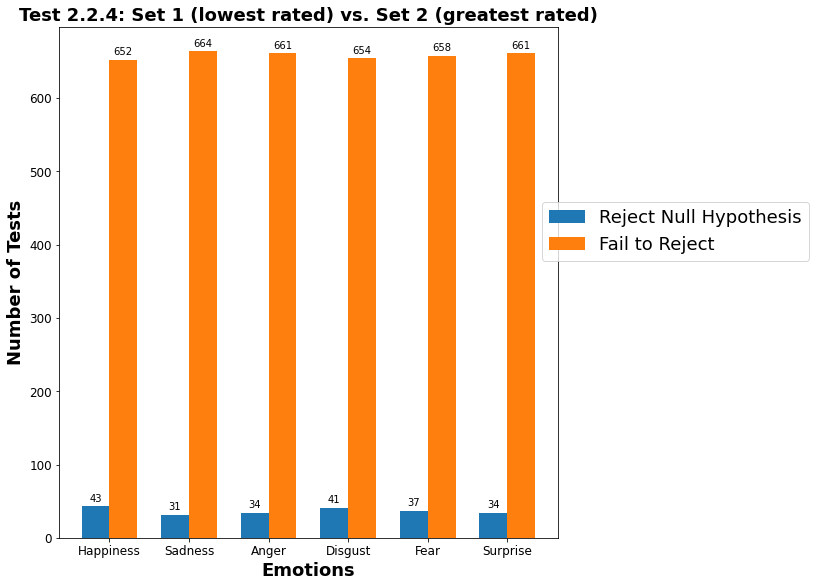

In [86]:


labels = ['Happiness', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Surprise']
rejections = [count_happiness_reject, count_sadness_reject, count_anger_reject, count_disgust_reject, count_fear_reject, count_surprise_reject]
fail_rejections = [count_happiness_fail, count_sadness_fail, count_anger_fail, count_disgust_fail, count_fear_fail, count_surprise_fail]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rejections, width, label='Reject Null Hypothesis')
rects2 = ax.bar(x + width/2, fail_rejections, width, label='Fail to Reject')

ax.set_ylabel('Number of Tests', fontsize=18, fontweight="bold")
ax.set_xlabel("Emotions", fontsize=18, fontweight="bold")
ax.set_title('Test 2.2.4: Set 1 (lowest rated) vs. Set 2 (greatest rated)', fontsize=18, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.show()

In [87]:
# totally 36 columns for 6 groups of the rho values for the 6 emotions (6x6=36) plus 36 columns for their respective p values
# aggregated total: 72 columns

r_coeff_sets_rat_low_vs_high= pd.DataFrame(
    {
     "p_happ_str_neg" : pd.Series(p_happ_str_neg), "p_happ_med_neg": pd.Series(p_happ_med_neg), "p_happ_low_neg": pd.Series(p_happ_low_neg),
     "p_happ_low_pos": pd.Series(p_happ_low_pos), "p_happ_med_pos": pd.Series(p_happ_med_pos), "p_happ_str_pos": pd.Series(p_happ_str_pos),
     
     "happiness_strong_neg" : pd.Series(happiness_strong_neg), "happiness_med_neg": pd.Series(happiness_med_neg),"happiness_low_neg": pd.Series(happiness_low_neg),
     "happiness_low_pos": pd.Series(happiness_low_pos), "happiness_med_pos": pd.Series(happiness_med_pos), "happiness_strong_pos": pd.Series(happiness_strong_pos),


     "p_sad_str_neg": pd.Series(p_sad_str_neg), "p_sad_med_neg": pd.Series(p_sad_med_neg), "p_sad_low_neg":pd.Series(p_sad_low_neg),
     "p_sad_low_pos": pd.Series(p_sad_low_pos), "p_sad_med_pos": pd.Series(p_sad_med_pos), "p_sad_str_pos": pd.Series(p_sad_str_pos),

     "sadness_strong_neg": pd.Series(sadness_strong_neg), "sadness_med_neg": pd.Series(sadness_med_neg), "sadness_low_neg": pd.Series(sadness_low_neg),
     "sadness_low_pos": pd.Series(sadness_low_pos), "sadness_med_pos": pd.Series(sadness_med_pos), "sadness_strong_pos": pd.Series(sadness_strong_pos),

     "p_anger_str_neg": pd.Series(p_anger_str_neg), "p_anger_med_neg": pd.Series(p_anger_med_neg), "p_anger_low_neg": pd.Series(p_anger_low_neg),
     "p_anger_low_pos": pd.Series(p_anger_low_pos), "p_anger_med_pos":pd.Series(p_anger_med_pos), "p_anger_str_pos": pd.Series(p_anger_str_pos),

     "anger_strong_neg": pd.Series(anger_strong_neg), "anger_med_neg": pd.Series(anger_med_neg), "anger_low_neg": pd.Series(anger_low_neg),
     "anger_low_pos": pd.Series(anger_low_pos), "anger_med_pos": pd.Series(anger_med_pos), "anger_strong_pos": pd.Series(anger_strong_pos),

     "p_disg_str_neg": pd.Series(p_disg_str_neg), "p_disg_med_neg":pd.Series(p_disg_med_neg), "p_disg_low_neg":pd.Series(p_disg_low_neg),
     "p_disg_low_pos": pd.Series(p_disg_low_pos), "p_disg_med_pos": pd.Series(p_disg_med_pos), "p_disg_str_pos":pd.Series(p_disg_str_pos),

     "disgust_strong_neg": pd.Series(disgust_strong_neg), "disgust_med_neg": pd.Series(disgust_med_neg), "disgust_low_neg":pd.Series(disgust_low_neg),
     "disgust_low_pos": pd.Series(disgust_low_pos), "disgust_med_pos": pd.Series(disgust_med_pos), "disgust_strong_pos": pd.Series(disgust_strong_pos),

      
     "p_fear_str_neg":pd.Series(p_fear_str_neg), "p_fear_med_neg": pd.Series(p_fear_med_neg), "p_fear_low_neg": pd.Series(p_fear_low_neg),
     "p_fear_low_pos": pd.Series(p_fear_low_pos), "p_fear_med_pos": pd.Series(p_fear_med_pos), "p_fear_str_pos": pd.Series(p_fear_str_pos),

     "fear_strong_neg": pd.Series(fear_strong_neg), "fear_med_neg": pd.Series(fear_med_neg), "fear_low_neg": pd.Series(fear_low_neg),
     "fear_low_pos": pd.Series(fear_low_pos), "fear_med_pos": pd.Series(fear_med_pos), "fear_strong_pos": pd.Series(fear_strong_pos),


     "p_sur_str_neg": pd.Series(p_sur_str_neg), "p_sur_med_neg": pd.Series(p_sur_med_neg), "p_sur_low_neg": pd.Series(p_sur_low_neg),
     "p_sur_low_pos": pd.Series(p_sur_low_pos), "p_sur_med_pos":pd.Series(p_sur_med_pos), "p_sur_str_pos":pd.Series(p_sur_str_pos),

     "surprise_strong_neg": pd.Series(surprise_strong_neg), "surprise_med_neg": pd.Series(surprise_med_neg), "surprise_low_neg":pd.Series(surprise_low_neg),
     "surprise_low_pos":pd.Series(surprise_low_pos), "surprise_med_pos": pd.Series(surprise_med_pos), "surprise_strong_pos": pd.Series(surprise_strong_pos)
    })



In [88]:
r_coeff_sets_rat_low_vs_high.shape

(17, 72)

In [89]:
r_coeff_sets_rat_low_vs_high.describe().round(decimals=4)

,p_happ_str_neg,p_happ_med_neg,p_happ_low_neg,p_happ_low_pos,p_happ_med_pos,p_happ_str_pos,happiness_strong_neg,happiness_med_neg,happiness_low_neg,happiness_low_pos,happiness_med_pos,happiness_strong_pos,p_sad_str_neg,p_sad_med_neg,p_sad_low_neg,p_sad_low_pos,p_sad_med_pos,p_sad_str_pos,sadness_strong_neg,sadness_med_neg,sadness_low_neg,sadness_low_pos,sadness_med_pos,sadness_strong_pos,p_anger_str_neg,p_anger_med_neg,p_anger_low_neg,p_anger_low_pos,p_anger_med_pos,p_anger_str_pos,anger_strong_neg,anger_med_neg,anger_low_neg,anger_low_pos,anger_med_pos,anger_strong_pos,p_disg_str_neg,p_disg_med_neg,p_disg_low_neg,p_disg_low_pos,p_disg_med_pos,p_disg_str_pos,disgust_strong_neg,disgust_med_neg,disgust_low_neg,disgust_low_pos,disgust_med_pos,disgust_strong_pos,p_fear_str_neg,p_fear_med_neg,p_fear_low_neg,p_fear_low_pos,p_fear_med_pos,p_fear_str_pos,fear_strong_neg,fear_med_neg,fear_low_neg,fear_low_pos,fear_med_pos,fear_strong_pos,p_sur_str_neg,p_sur_med_neg,p_sur_low_neg,p_sur_low_pos,p_sur_med_pos,p_sur_str_pos,surprise_strong_neg,surprise_med_neg,surprise_low_neg,surprise_low_pos,surprise_med_pos,surprise_strong_pos
count,0.0,12.0000,9.0000,7.0000,15.0000,0.0,0.0,12.0000,9.0000,7.0000,15.0000,0.0,0.0,8.0000,7.0000,5.0000,11.0000,0.0,0.0,8.0000,7.0000,5.0000,11.0000,0.0,0.0,10.0000,7.0000,8.0000,9.0000,0.0,0.0,10.0000,7.0000,8.0000,9.0000,0.0,0.0,17.0000,6.0000,6.0000,12.0000,0.0,0.0,17.0000,6.0000,6.0000,12.0000,0.0,1.0000,14.0000,5.0000,6.0000,11.0000,0.0,1.0000,14.0000,5.0000,6.0000,11.0000,0.0,0.0,13.0000,9.0000,4.0000,8.0000,0.0,0.0,13.0000,9.0000,4.0000,8.0000,0.0
mean,NaN,0.0150,0.0426,0.0408,0.0166,NaN,NaN,-0.3494,-0.2882,0.2907,0.3435,NaN,NaN,0.0207,0.0426,0.0434,0.0207,NaN,NaN,-0.3313,-0.2882,0.2871,0.3367,NaN,NaN,0.0219,0.0424,0.0409,0.0203,NaN,NaN,-0.3307,-0.2886,0.2903,0.3389,NaN,NaN,0.0183,0.0445,0.0410,0.0174,NaN,NaN,-0.3389,-0.2857,0.2903,0.3507,NaN,0.0002,0.0131,0.0437,0.0434,0.0148,NaN,-0.5055,-0.3624,-0.2867,0.2870,0.3483,NaN,NaN,0.0189,0.0449,0.0435,0.0148,NaN,NaN,-0.3393,-0.2852,0.2869,0.3601,NaN
std,NaN,0.0083,0.0045,0.0048,0.0082,NaN,NaN,0.0307,0.0059,0.0066,0.0294,NaN,NaN,0.0098,0.0052,0.0042,0.0121,NaN,NaN,0.0266,0.0070,0.0055,0.0403,NaN,NaN,0.0103,0.0067,0.0029,0.0116,NaN,NaN,0.0341,0.0090,0.0041,0.0443,NaN,NaN,0.0086,0.0040,0.0050,0.0103,NaN,NaN,0.0301,0.0052,0.0068,0.0551,NaN,NaN,0.0087,0.0044,0.0043,0.0075,NaN,NaN,0.0463,0.0057,0.0060,0.0268,NaN,NaN,0.0095,0.0045,0.0030,0.0119,NaN,NaN,0.0368,0.0061,0.0039,0.0519,NaN
min,NaN,0.0032,0.0377,0.0347,0.0042,NaN,NaN,-0.4088,-0.2948,0.2799,0.3091,NaN,NaN,0.0074,0.0348,0.0389,0.0027,NaN,NaN,-0.3746,-0.2992,0.2794,0.3007,NaN,NaN,0.0029,0.0353,0.0367,0.0019,NaN,NaN,-0.4121,-0.2983,0.2849,0.3004,NaN,NaN,0.0034,0.0387,0.0354,0.0002,NaN,NaN,-0.4070,-0.2933,0.2796,0.3073,NaN,0.0002,0.0006,0.0391,0.0348,0.0039,NaN,-0.5055,-0.4680,-0.2928,0.2831,0.3088,NaN,NaN,0.0017,0.0350,0.0406,0.0009,NaN,NaN,-0.4328,-0.2989,0.2816,0.3033,NaN
25%,NaN,0.0091,0.0389,0.0376,0.0112,NaN,NaN,-0.3653,-0.2930,0.2873,0.3250,NaN,NaN,0.0126,0.0393,0.0398,0.0115,NaN,NaN,-0.3505,-0.2925,0.2845,0.3040,NaN,NaN,0.0144,0.0360,0.0390,0.0135,NaN,NaN,-0.3443,-0.2974,0.2879,0.3126,NaN,NaN,0.0131,0.0417,0.0373,0.0100,NaN,NaN,-0.3487,-0.2891,0.2880,0.3134,NaN,0.0002,0.0071,0.0407,0.0441,0.0088,NaN,-0.5055,-0.3769,-0.2905,0.2839,0.3291,NaN,NaN,0.0141,0.0437,0.0417,0.0054,NaN,NaN,-0.3451,-0.2864,0.2854,0.3260,NaN
50%,NaN,0.0149,0.0402,0.0400,0.0175,NaN,NaN,-0.3426,-0.2911,0.2914,0.3347,NaN,NaN,0.0206,0.0423,0.0435,0.0196,NaN,NaN,-0.3266,-0.2884,0.2867,0.3292,NaN,NaN,0.0235,0.0422,0.0416,0.0219,NaN,NaN,-0.3201,-0.2885,0.2893,0.3236,NaN,NaN,0.0189,0.0451,0.0413,0.0196,NaN,NaN,-0.3309,-0.2847,0.2897,0.3294,NaN,0.0002,0.0136,0.0418,0.0447,0.0128,NaN,-0.5055,-0.3469,-0.2890,0.2852,0.3496,NaN,NaN,0.0205,0.0452,0.0429,0.0133,NaN,NaN,-0.3268,-0.2845,0.2876,0.3492,NaN
75%,NaN,0.0202,0.0463,0.0431,0.0213,NaN,NaN,-0.3277,-0.2832,0.2949,0.3562,NaN,NaN,0.0286,0.0472,0.0452,0.0319,NaN,NaN,-0.3099,-0.2821,0.2917,0.357

In [90]:
'''
from google.colab import files

r_coeff_sets_rat_low_vs_high.to_csv('r_coeff_sets_rat_low_vs_high.csv', index=False)
files.download('r_coeff_sets_rat_low_vs_high.csv')
'''

"\nfrom google.colab import files\n\nr_coeff_sets_rat_low_vs_high.to_csv('r_coeff_sets_rat_low_vs_high.csv', index=False)\nfiles.download('r_coeff_sets_rat_low_vs_high.csv')\n"